In [511]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from astropy.timeseries import LombScargle
import random

from scipy.signal import find_peaks

In [512]:
#Definicion de la funcion de fase
def phi(t,t0,p):
    return (((t-t0)/p)-int((t-t0)/p))

## Se importan datos de  las estrellas variables

In [513]:
archivos=glob.glob("*.txt")

In [514]:
archivos
# nueve estrellas variables a clacular su periodo

['D2b27910.txt',
 'D2b279100.txt',
 'D2b2791000.txt',
 'D2b2791001.txt',
 'D2b2791002.txt',
 'D2b2791003.txt',
 'D2b2791004.txt',
 'D2b2791005.txt',
 'D2b2791006.txt',
 'D2b2791007.txt',
 'D2b2791008.txt',
 'D2b2791009.txt',
 'D2b279101.txt',
 'D2b2791010.txt',
 'D2b2791011.txt',
 'D2b2791012.txt',
 'D2b2791013.txt',
 'D2b2791014.txt',
 'D2b2791015.txt',
 'D2b2791016.txt',
 'D2b2791017.txt',
 'D2b2791018.txt',
 'D2b2791019.txt',
 'D2b279102.txt',
 'D2b2791020.txt',
 'D2b2791021.txt',
 'D2b2791022.txt',
 'D2b2791023.txt',
 'D2b2791024.txt',
 'D2b2791025.txt',
 'D2b2791026.txt',
 'D2b2791027.txt',
 'D2b2791028.txt',
 'D2b2791029.txt',
 'D2b279103.txt',
 'D2b2791030.txt',
 'D2b27912866.txt',
 'D2b27912867.txt',
 'D2b27912868.txt',
 'D2b27912869.txt',
 'D2b27912870.txt',
 'D2b27912871.txt',
 'D2b27912872.txt',
 'D2b27912873.txt',
 'D2b27912874.txt',
 'D2b27912875.txt',
 'D2b27912876.txt',
 'D2b27912877.txt',
 'D2b27912878.txt',
 'D2b27912879.txt',
 'D2b27912880.txt',
 'D2b27912881.txt',
 '

In [515]:
"""
Los archivos tienen columnas de tiempos, intensidad, error.
los datos se guardan en 3 diccionarios distintos en los que cada llave corresponde al nombre de la estrella y su valor es un arreglo de datos (tiempo, intensidad o error)
"""
estrellas = {}

n=len(archivos)
i=0
while(i<n):
    nombre_archivo = archivos[i].replace('.txt', '')
    Datos = np.loadtxt(archivos[i], delimiter=',')
    
    datos = {}
    
    datos['tiempos'] = Datos[:,0]
    datos['intensidad'] = Datos[:,1]
    datos['error']= Datos[:,2]
    
    estrellas[nombre_archivo] = datos
    
    i=i+1

In [516]:
1/50

0.02


1. ver el fap 
2. elegir un mejor periodo, ver la grafica
3. multiplicar y dividir entre dos el mejor periodo elegido
4. ver grafica again
5. ver profundidad y dispersion 


La frecuencia que tiene la mayor potencia es el periodo.
Buscar periodos desde 0.05 a 50 dias, paso de 0.0001.
Debil y brillante al tiempo no se puede.

In [517]:
"""
Para cada archivo, se crea un linspace de frecuencia desde 0.05 a 50 dias y con 100000 pasos. (varía dependiendo de la estrella)  
Para cada archivo, se encuentra la potencia y la potencia maxima por medio de lomb scargle.
Para cada archivo, se encuentra el fap, que es como donde no es probable que se encuentre un periodo
"""

for i in range(n):
    nombre_archivo = archivos[i].replace('.txt', '')
    
    frecuencias = np.linspace(0.02, 20, 100000)
    
    potencia = LombScargle(estrellas[nombre_archivo]['tiempos'], estrellas[nombre_archivo]['intensidad'], estrellas[nombre_archivo]['error']).power(frecuencias)
    max_power = potencia.max()
    
    fap = LombScargle(estrellas[nombre_archivo]['tiempos'], estrellas[nombre_archivo]['intensidad'], estrellas[nombre_archivo]['error']).false_alarm_probability(max_power)
    
    estrellas[nombre_archivo]['frecuencias'] = frecuencias
    estrellas[nombre_archivo]['potencia'] = potencia
    estrellas[nombre_archivo]['fap'] = fap

In [518]:
len(estrellas.keys())


121

In [519]:
estrellas_filtradas = {}

In [520]:
for estrella_nombre in estrellas.keys():
    
    estrella = estrellas[estrella_nombre]
    potencia = estrella['potencia']
    fap = estrella['fap']
    frecuencia = estrella['frecuencias']
    
    picos, _ = find_peaks(potencia)
    picos_potencia = potencia[picos]
    picos_potencia_ordenados = np.sort(picos_potencia)[::-1]
    numero_picos=5
    picos_potencia = picos_potencia_ordenados[:numero_picos]
   
    picos_frecuencia = []
    picos_periodo = []
    picos_potencia_r =[]
    
    for pico_potencia in picos_potencia:        
        if(pico_potencia >= fap):
            indice_posicion = np.where(potencia == pico_potencia)[0][0]
            pico_frecuencia = frecuencia[indice_posicion]
            picos_frecuencia.append(pico_frecuencia)
            picos_periodo.append(1/pico_frecuencia)
            picos_potencia_r.append(potencia[indice_posicion])

            estrellas_filtradas[estrella_nombre] = estrella
            estrella['picos_potencia'] = picos_potencia_r
            estrella['picos_frecuencia'] = picos_frecuencia
            estrella['picos_periodo'] = picos_periodo

In [521]:
len(estrellas_filtradas.keys())
    

77

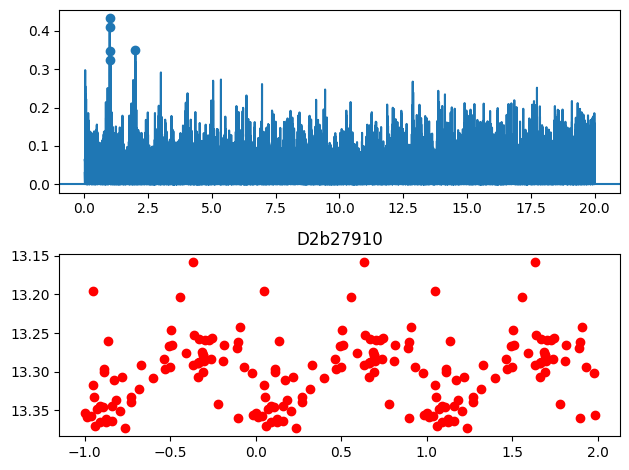

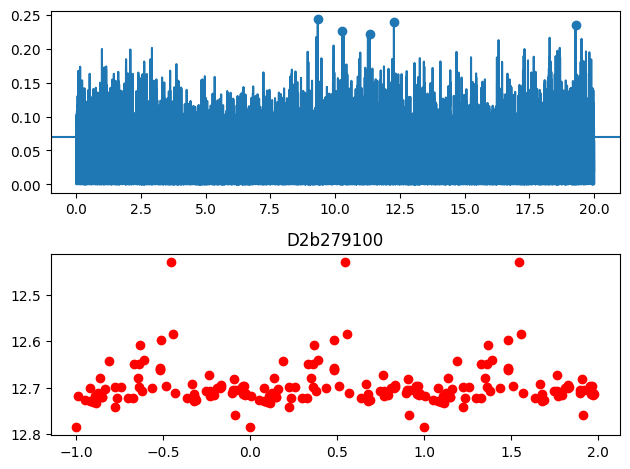

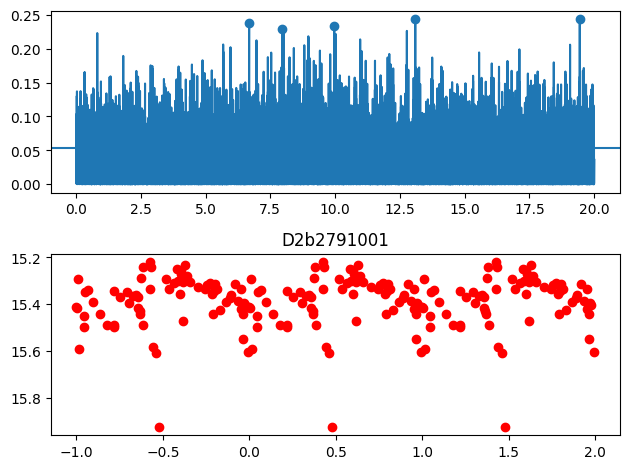

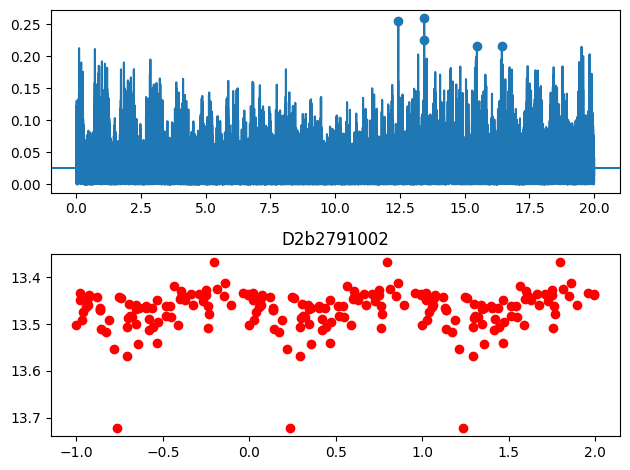

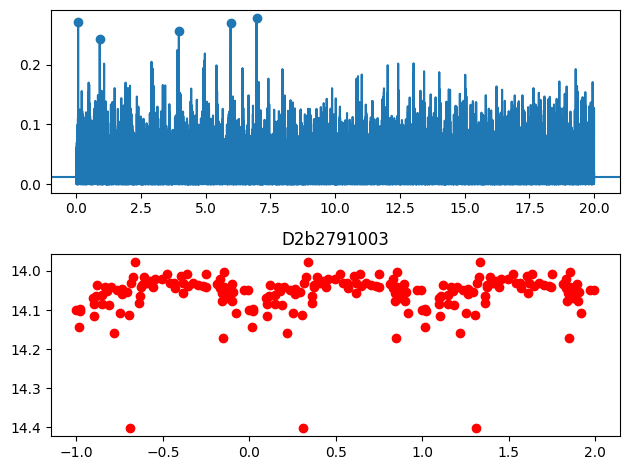

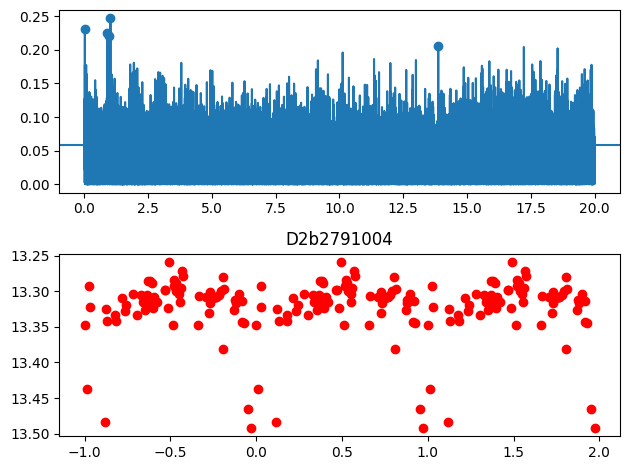

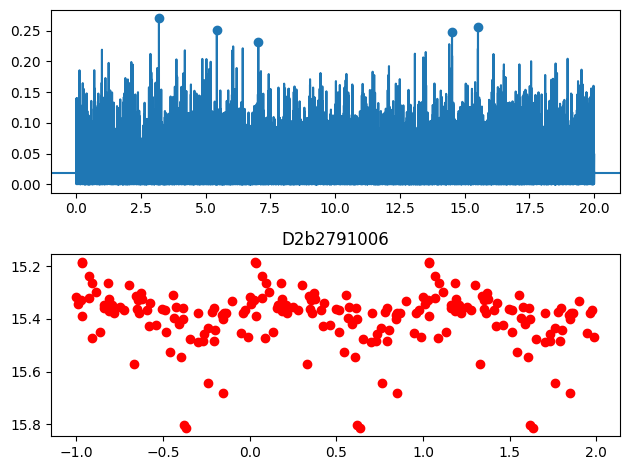

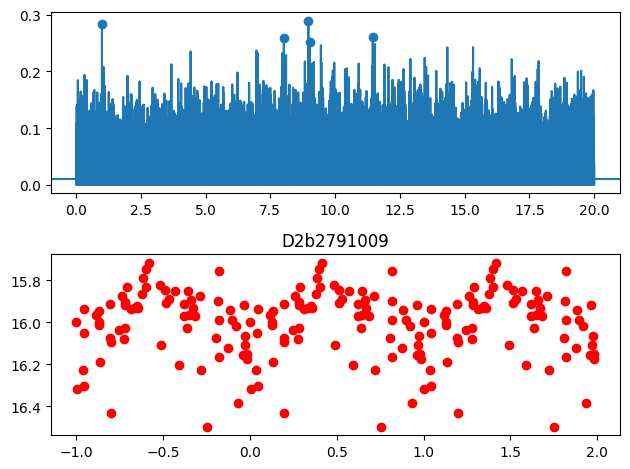

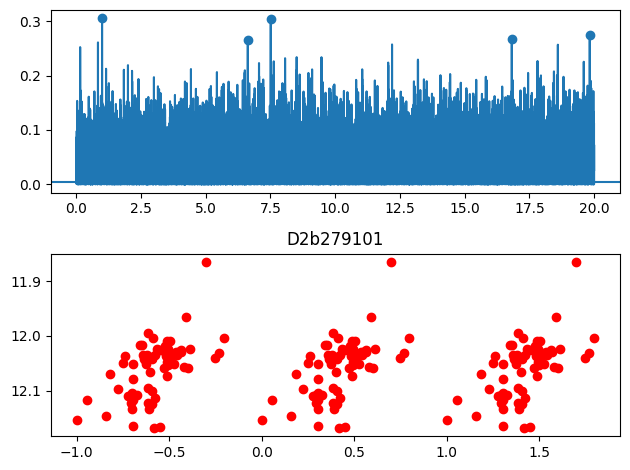

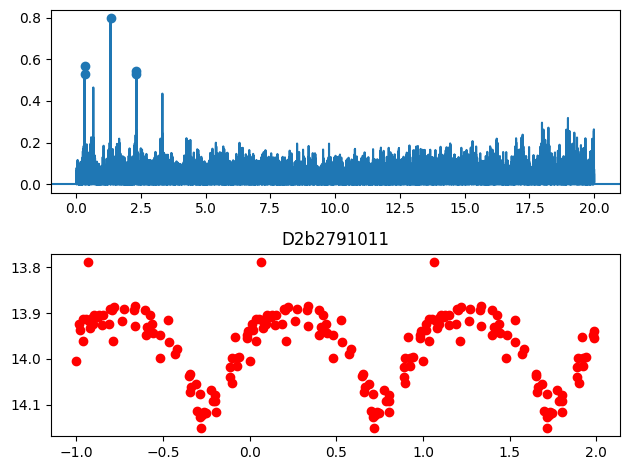

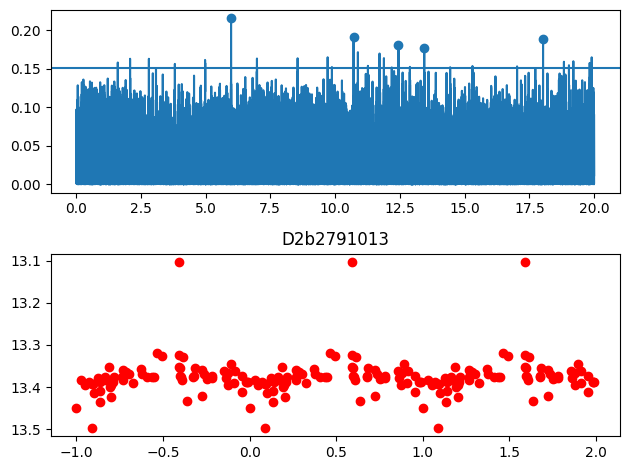

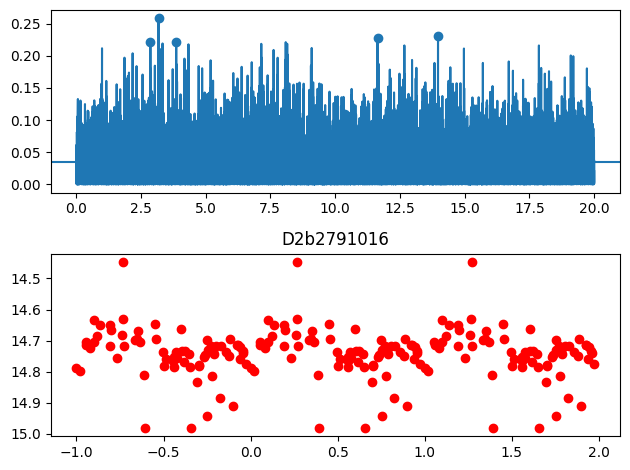

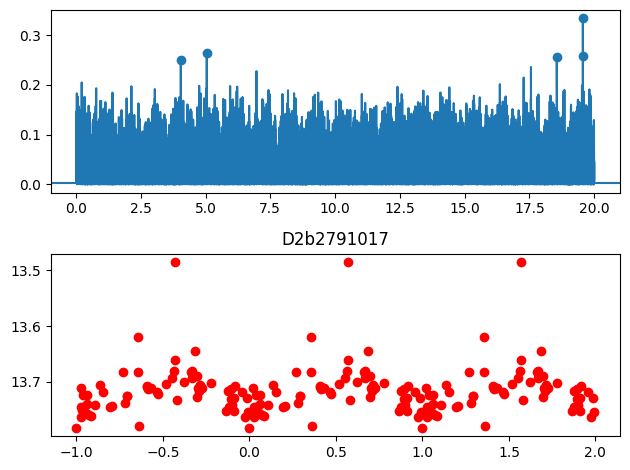

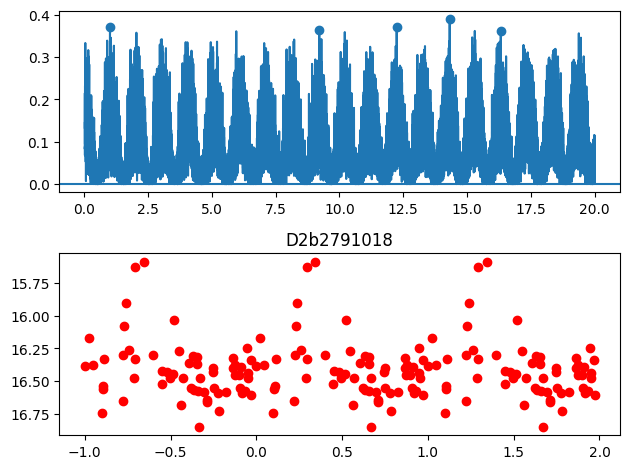

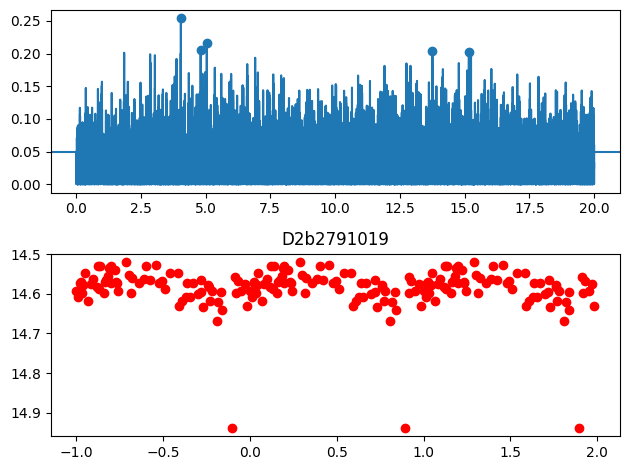

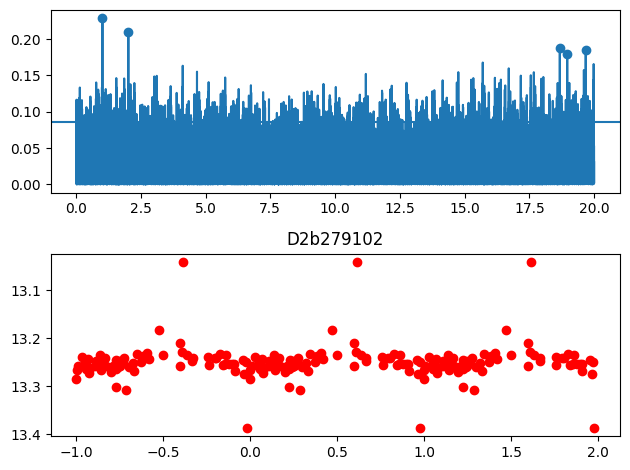

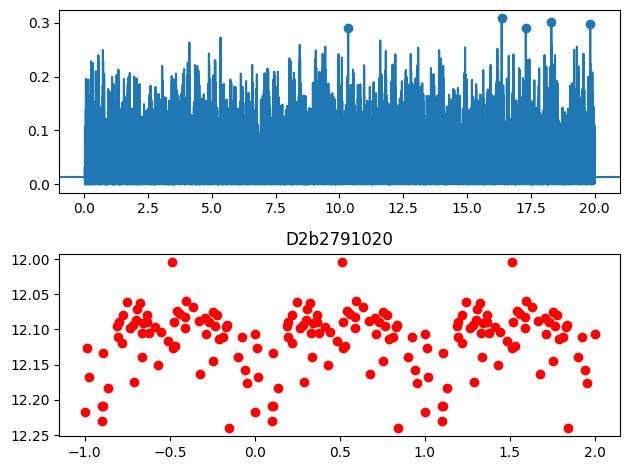

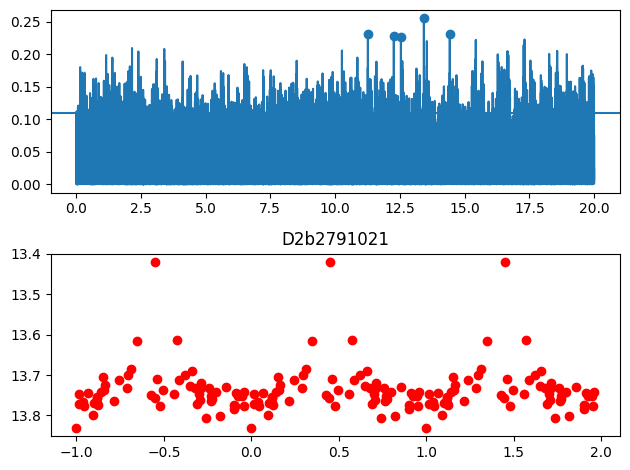

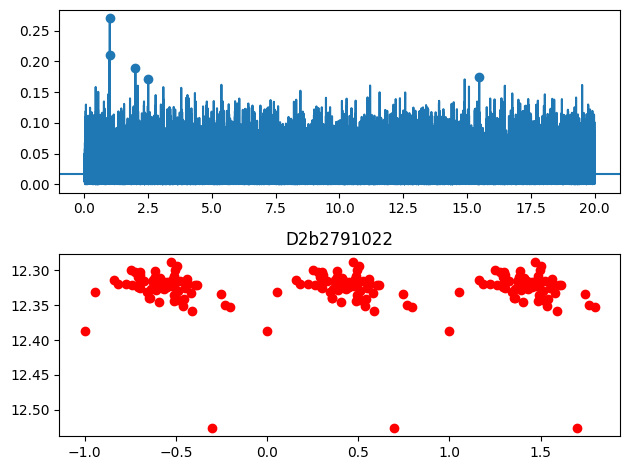

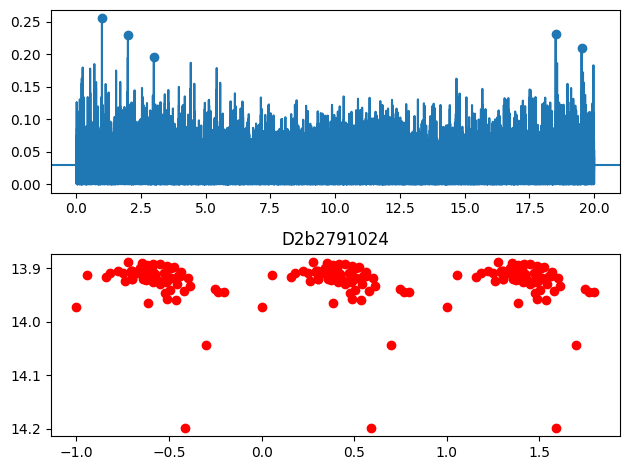

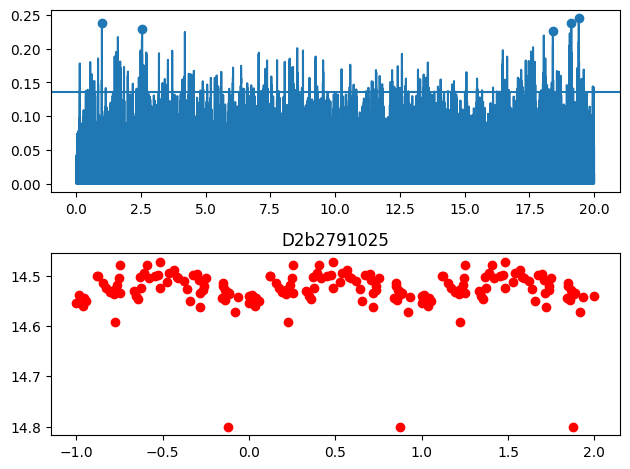

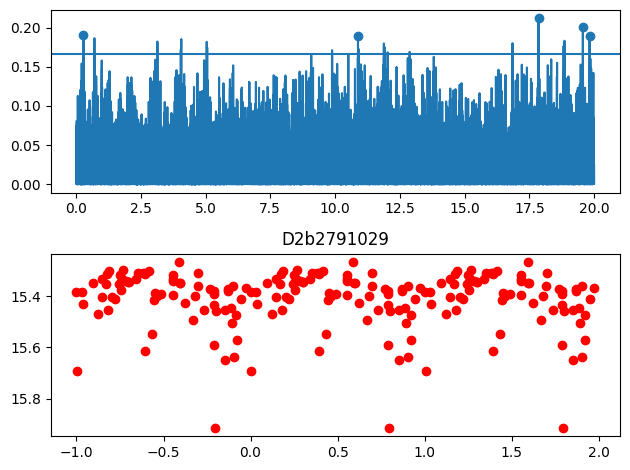

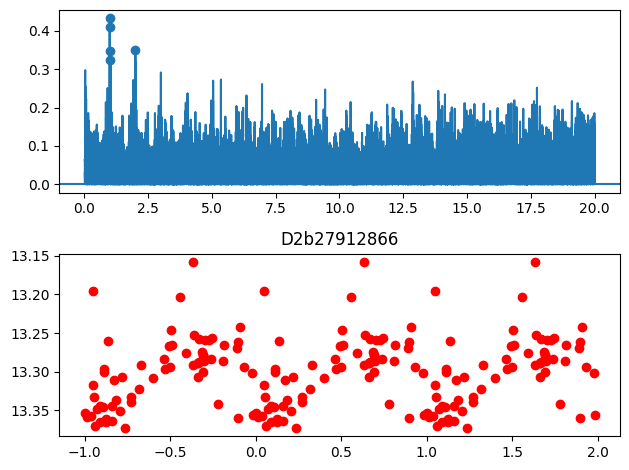

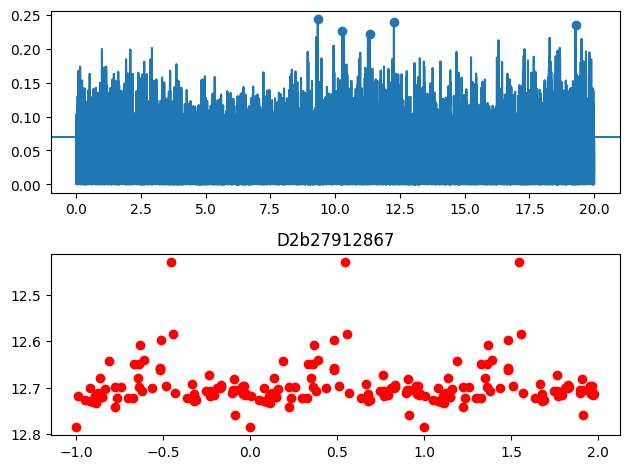

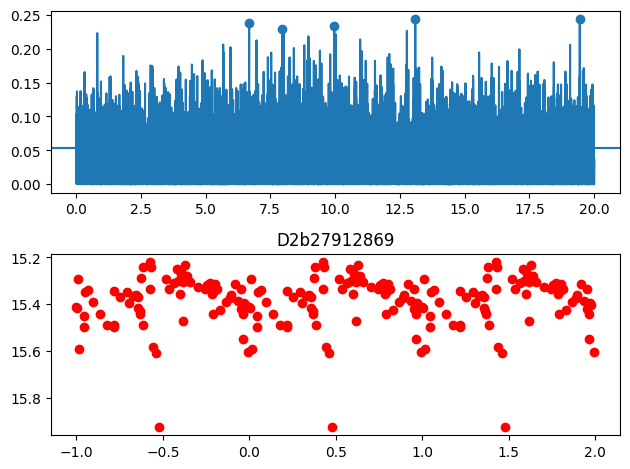

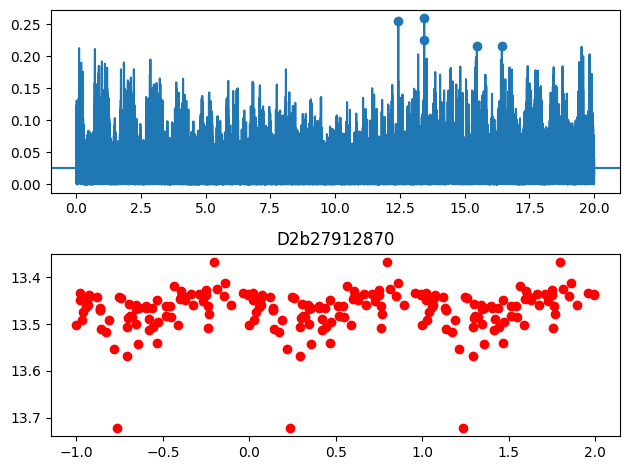

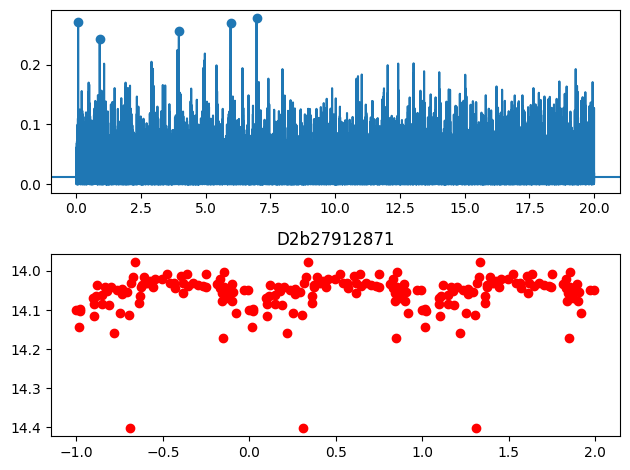

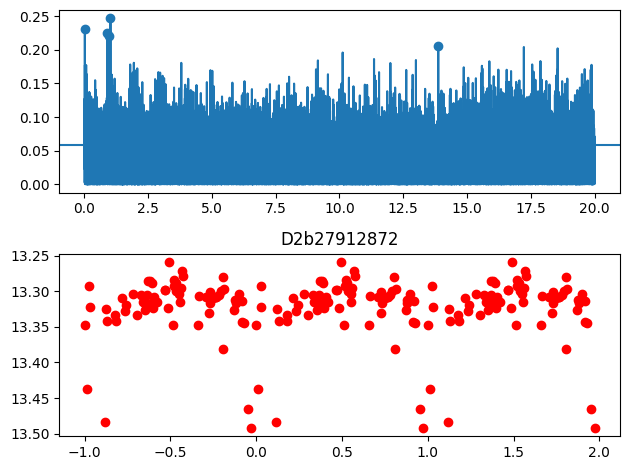

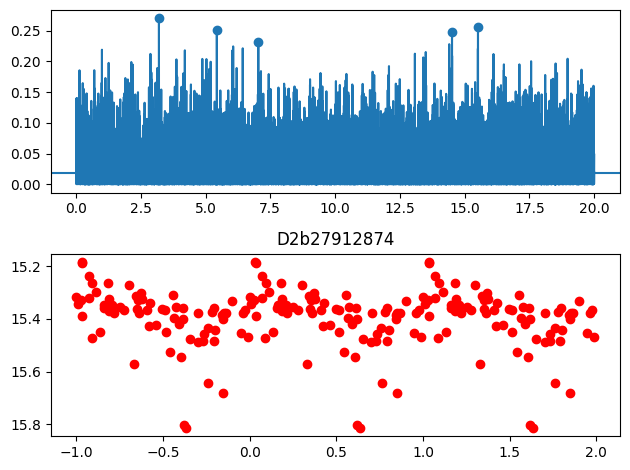

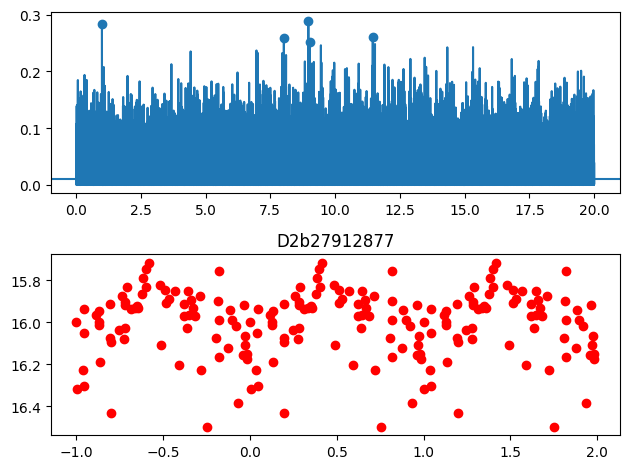

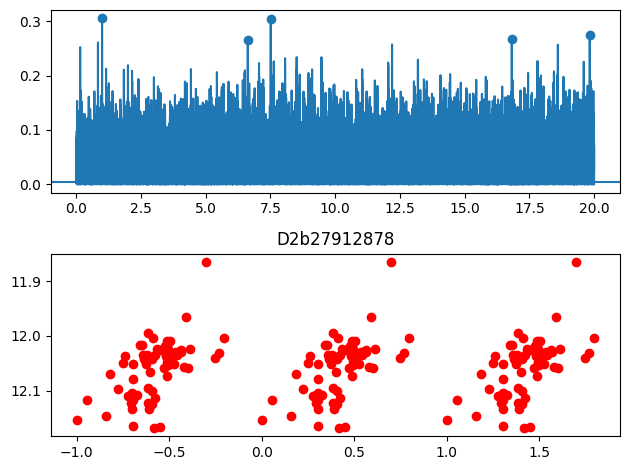

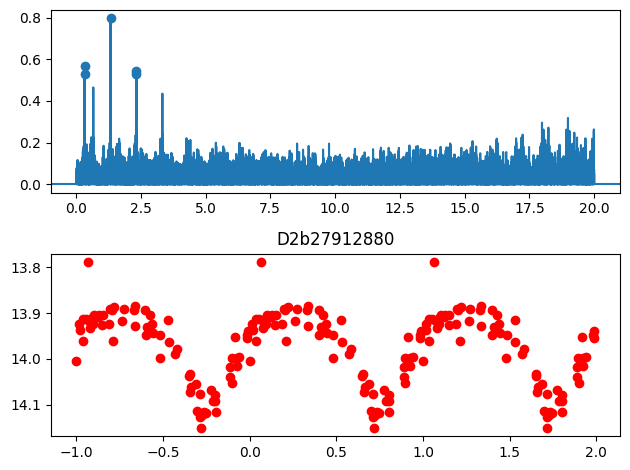

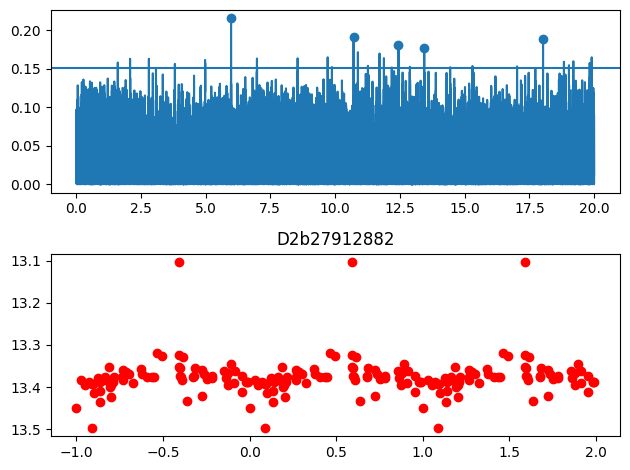

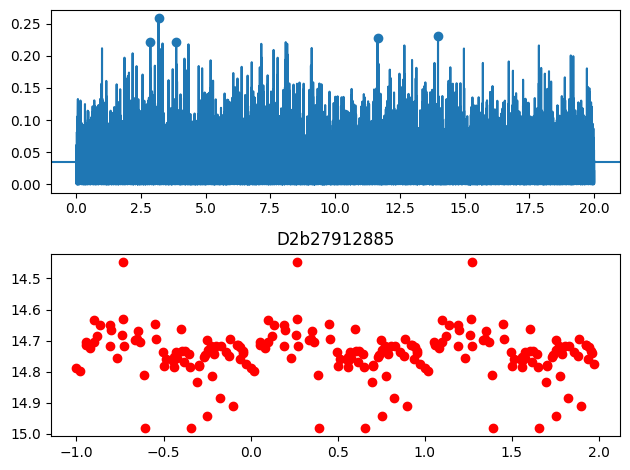

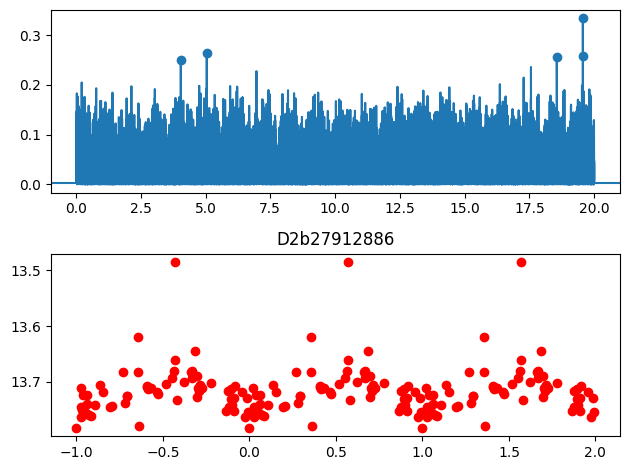

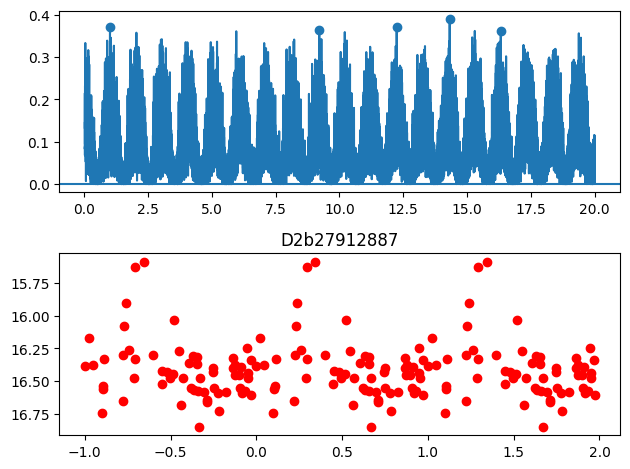

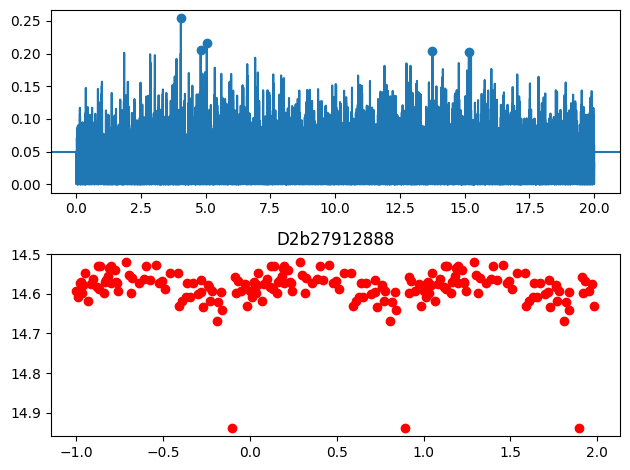

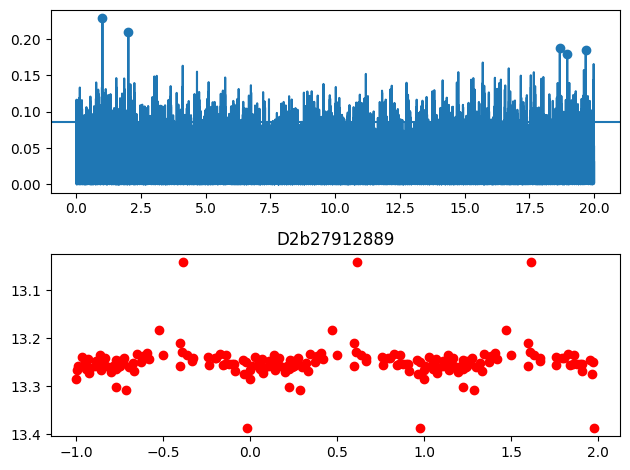

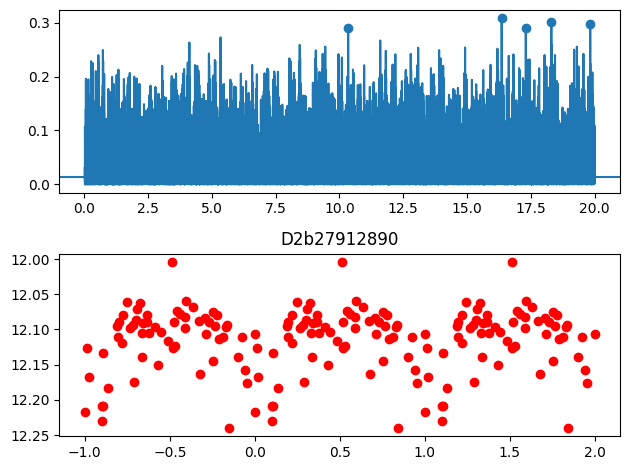

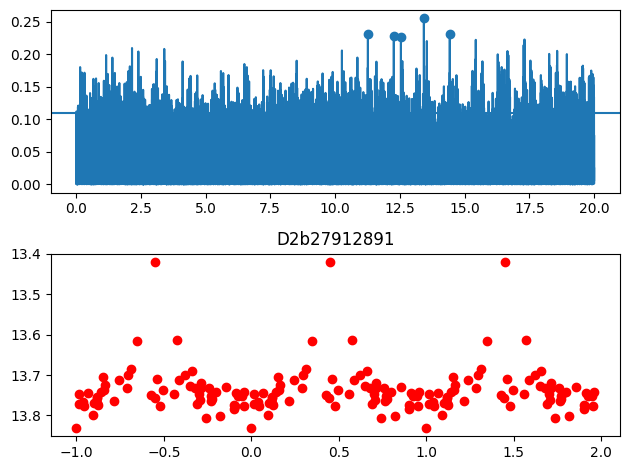

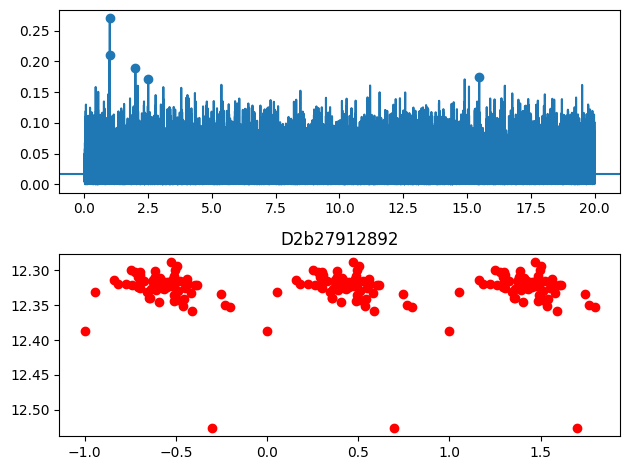

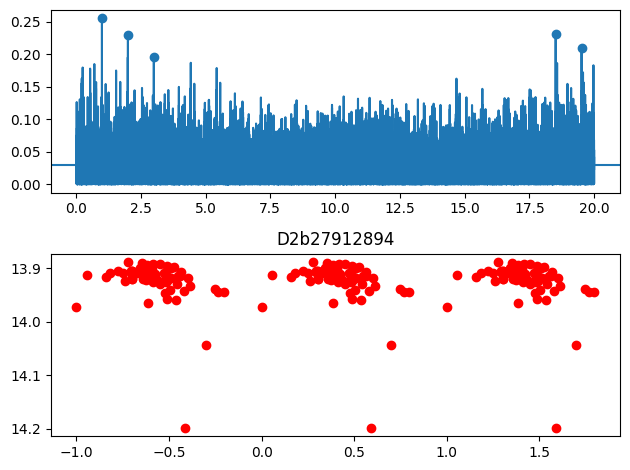

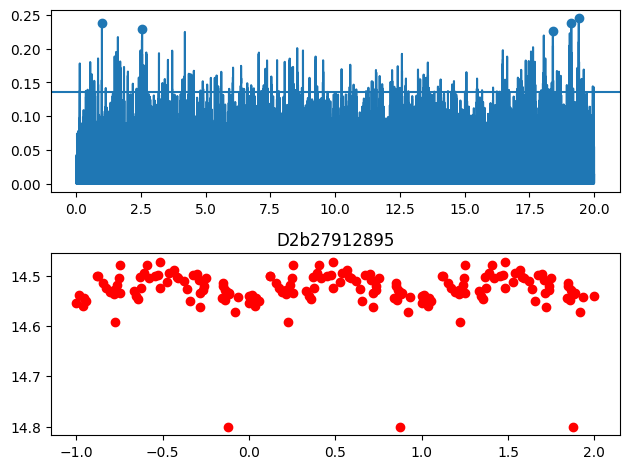

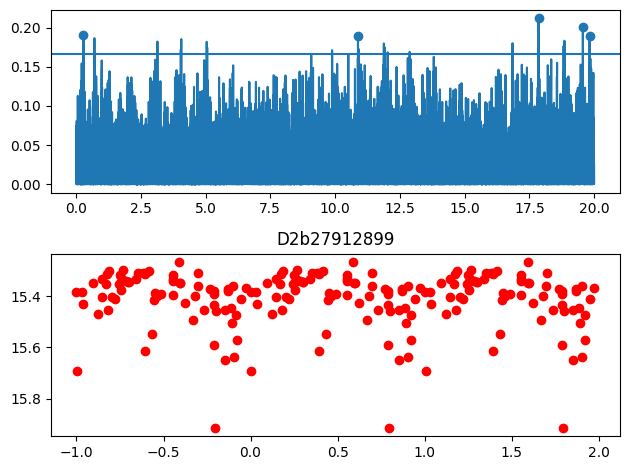

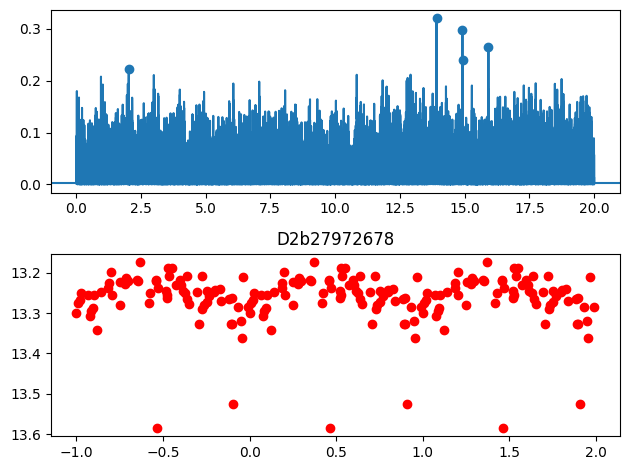

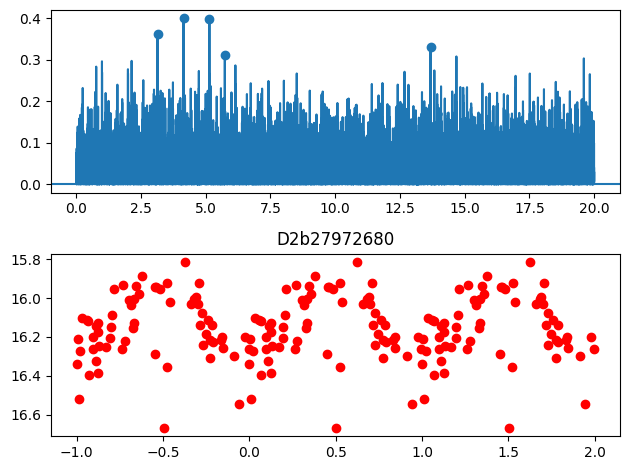

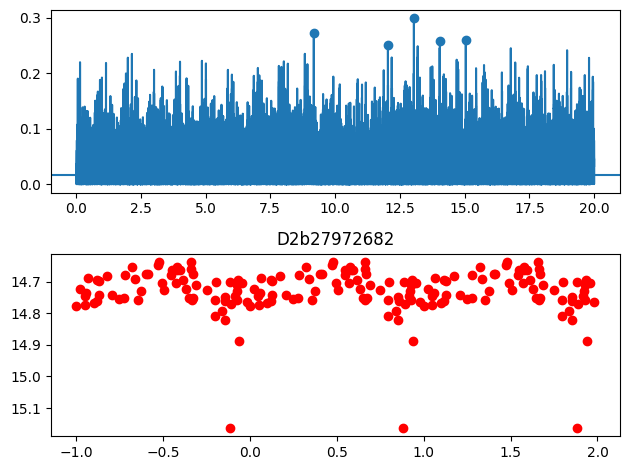

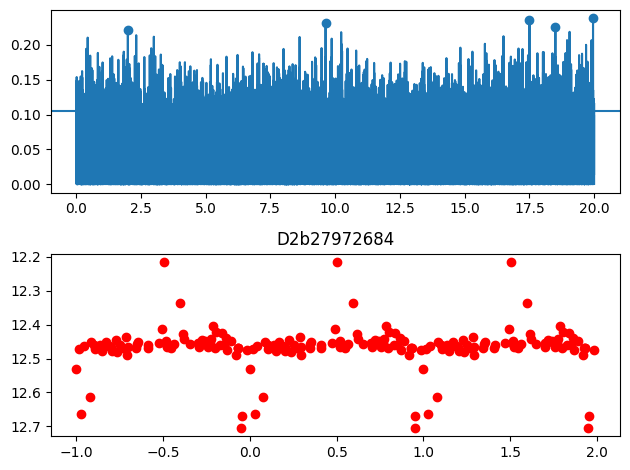

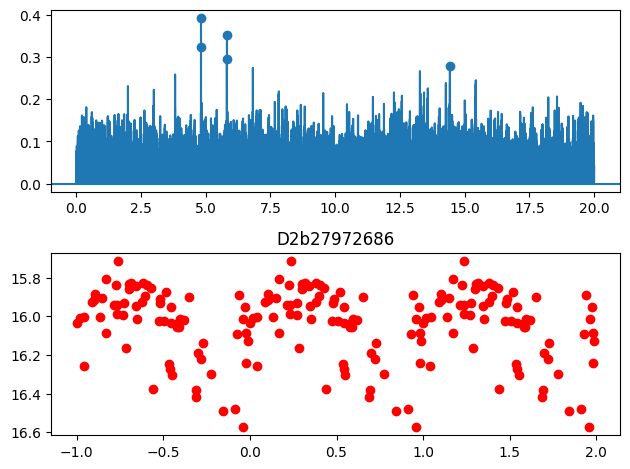

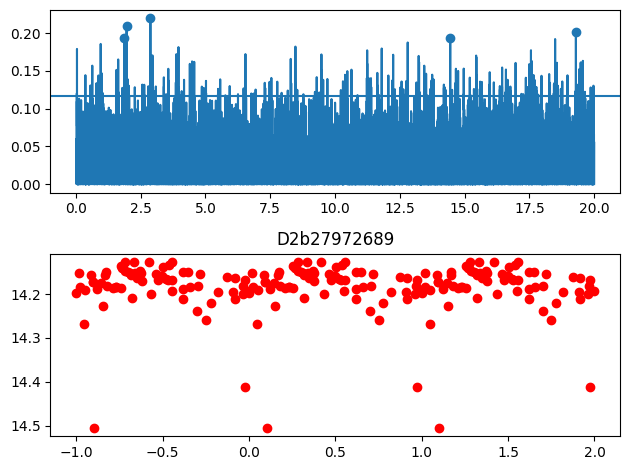

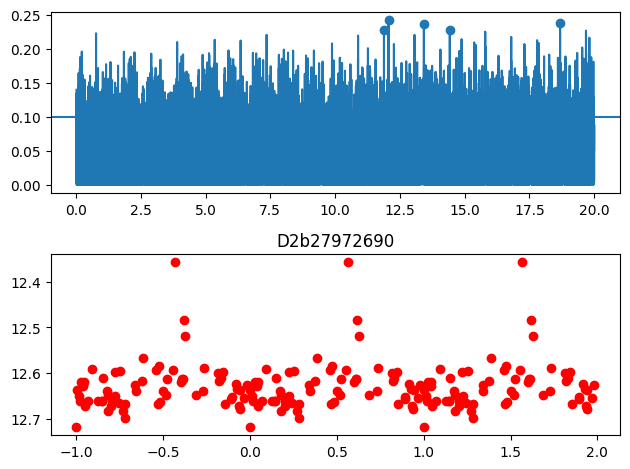

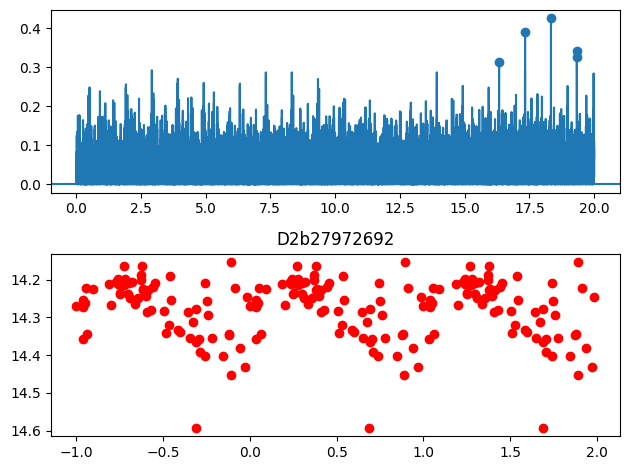

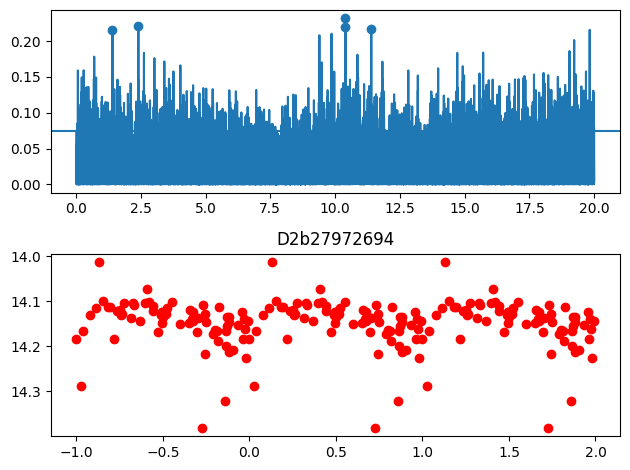

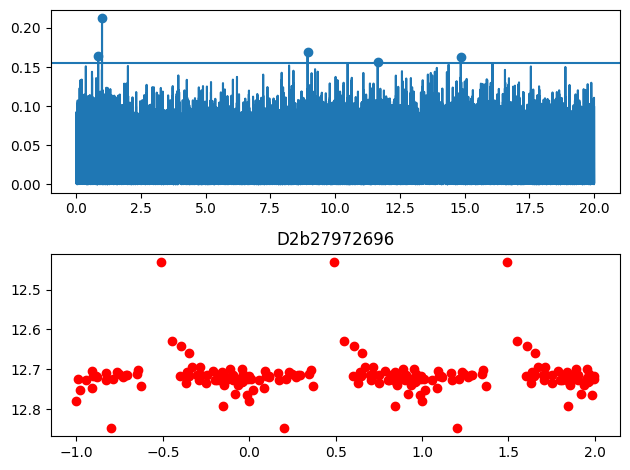

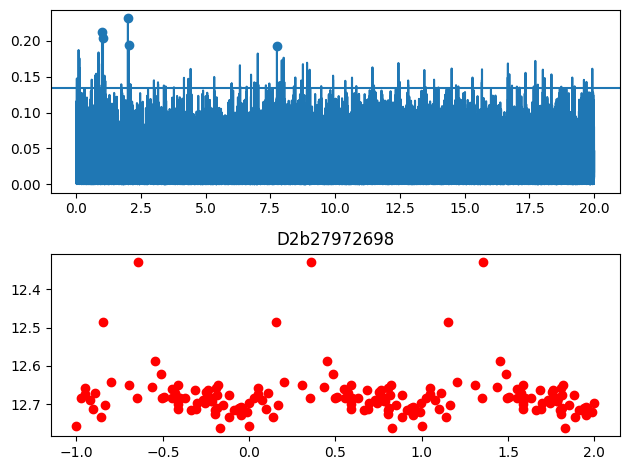

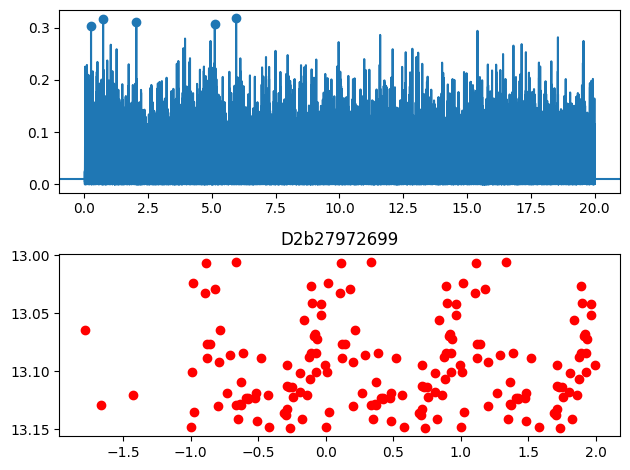

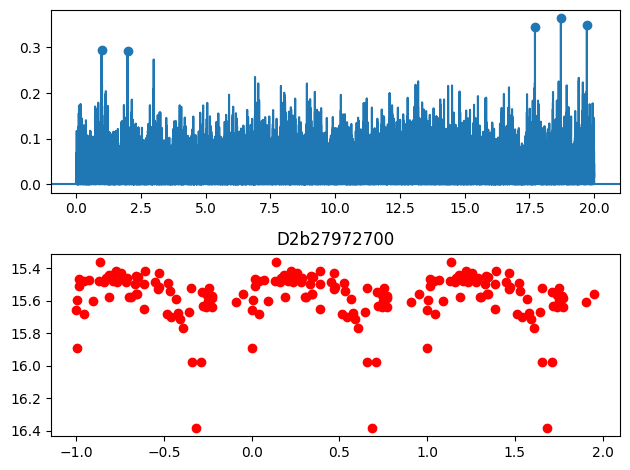

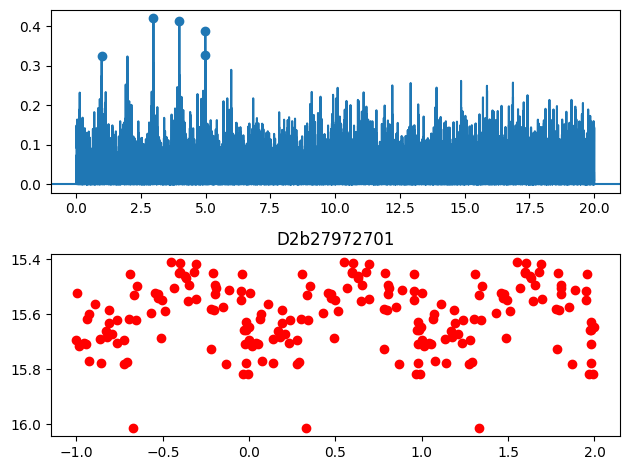

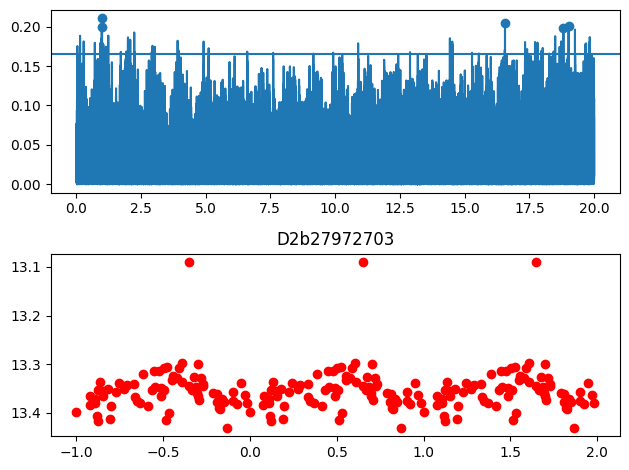

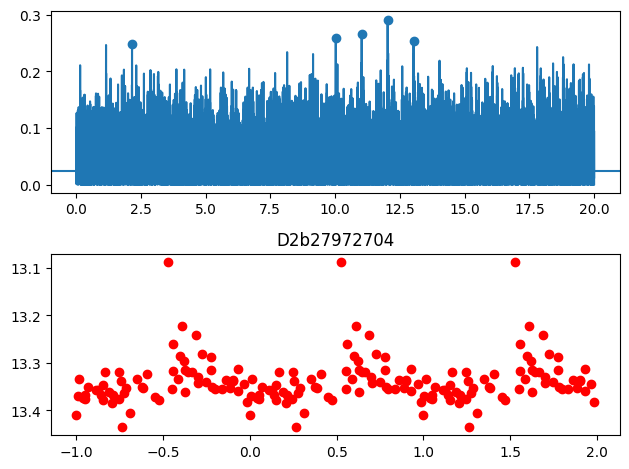

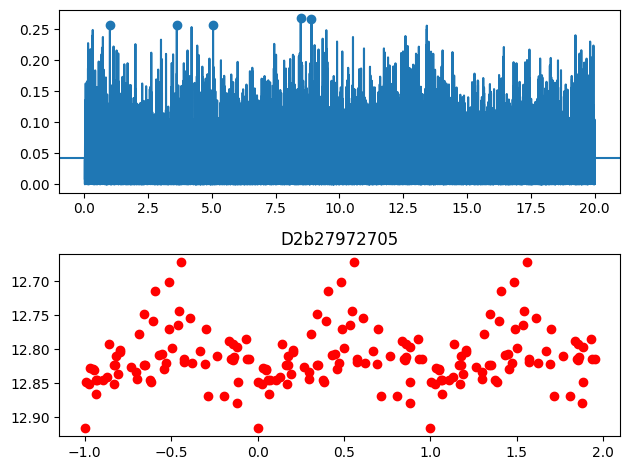

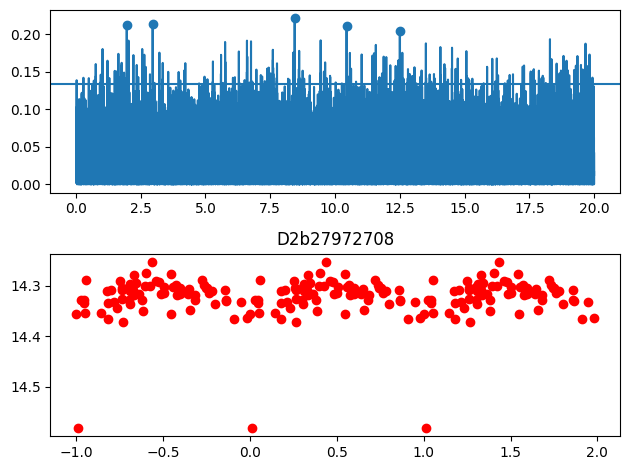

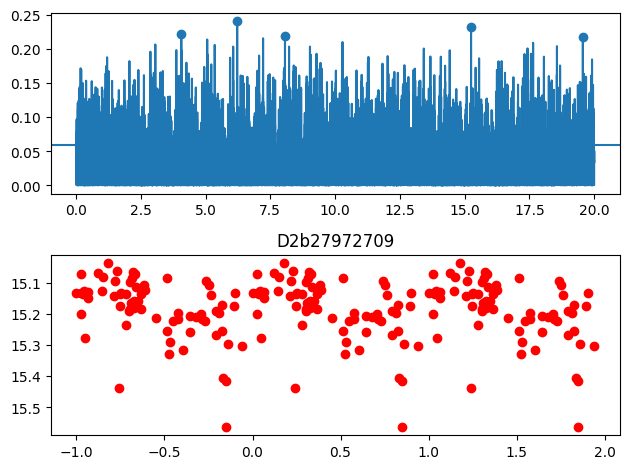

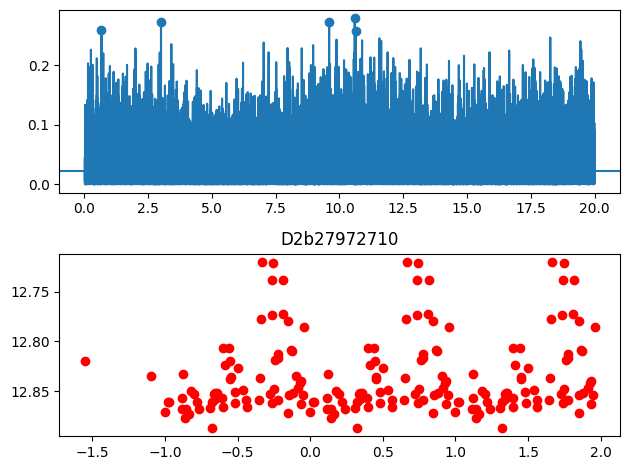

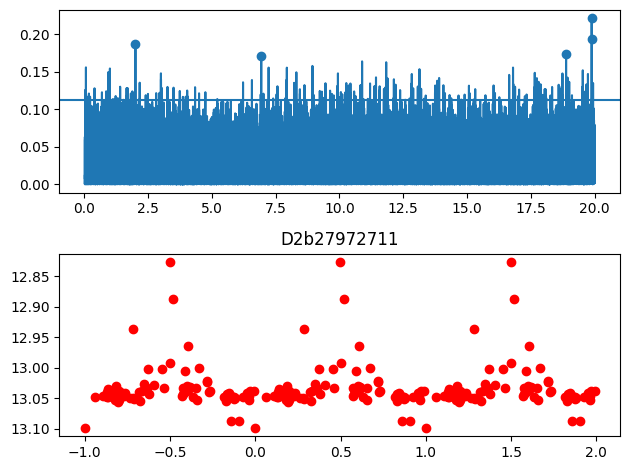

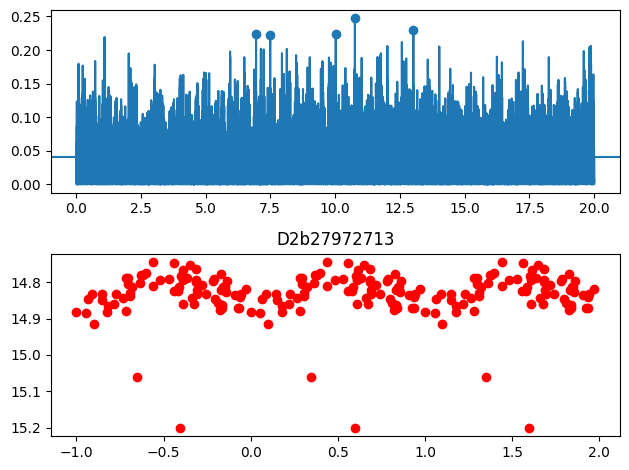

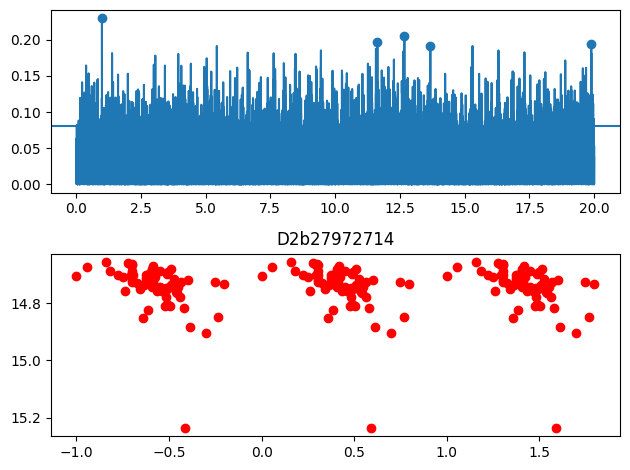

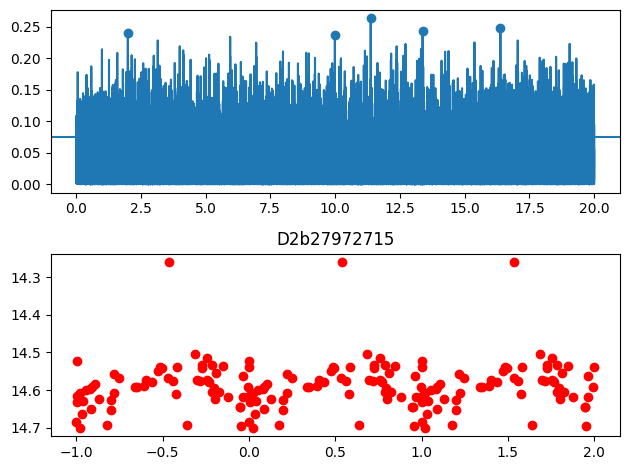

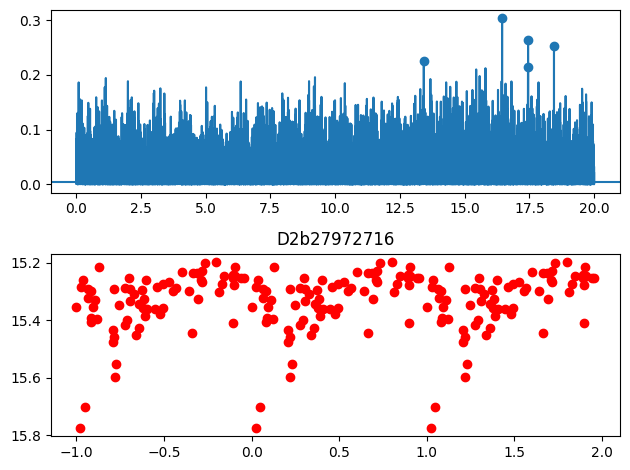

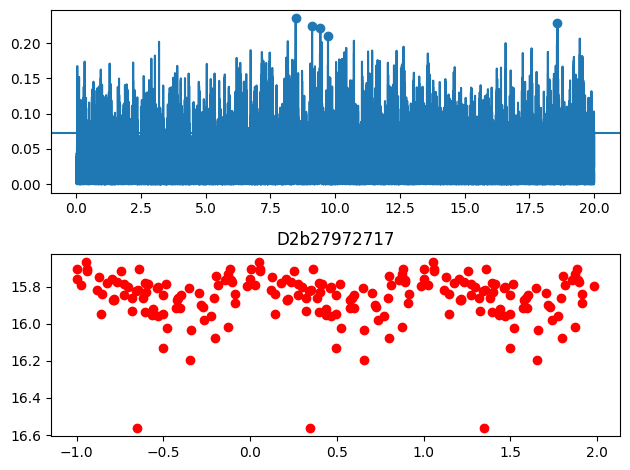

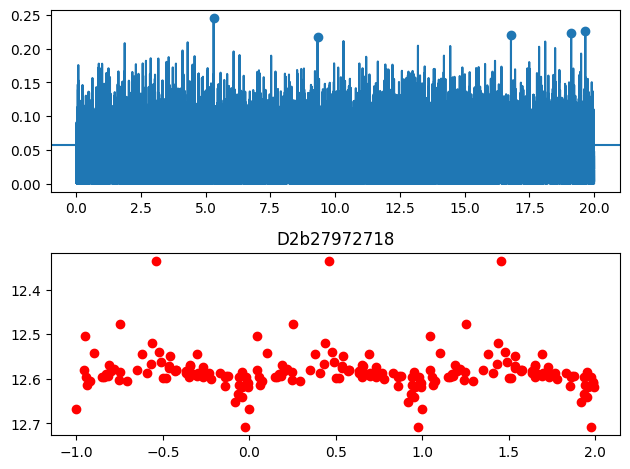

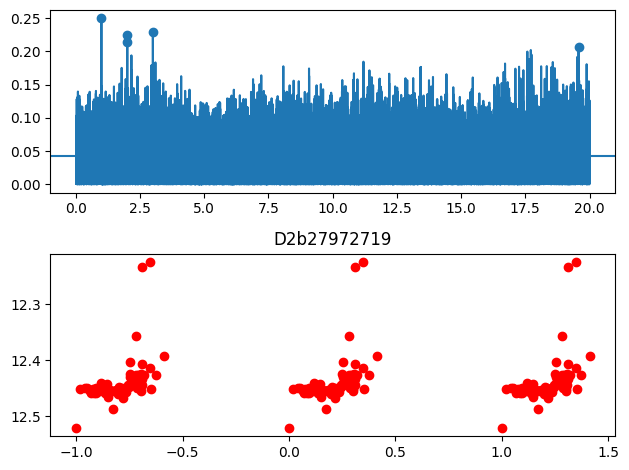

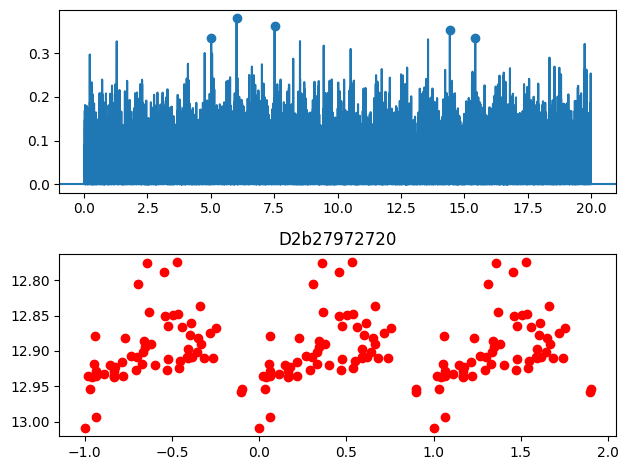

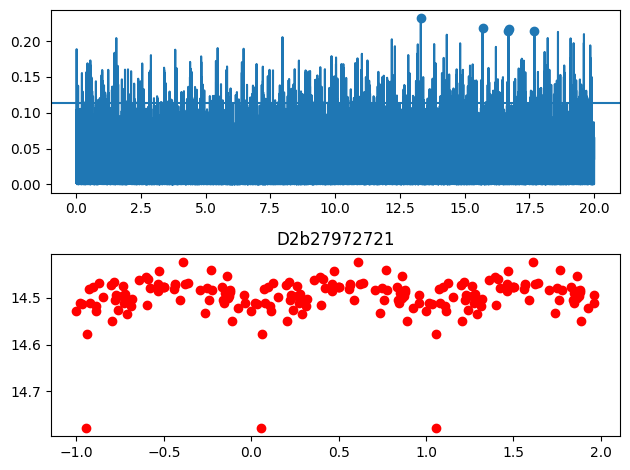

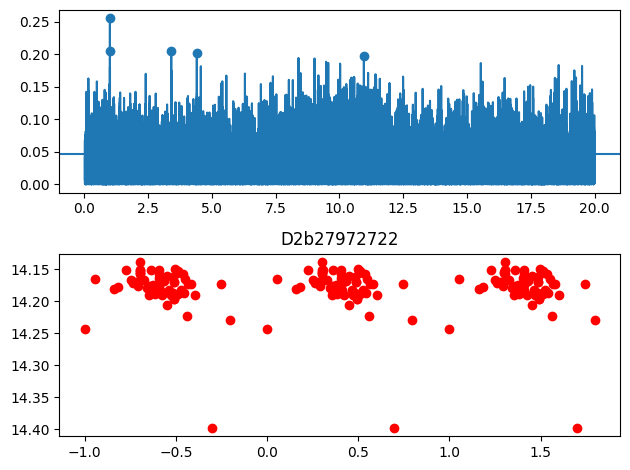

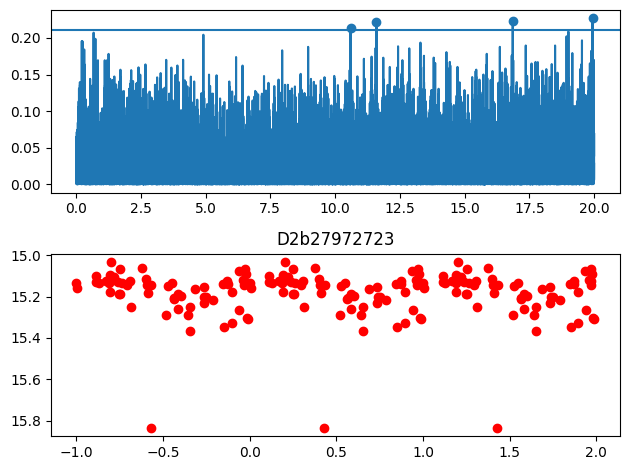

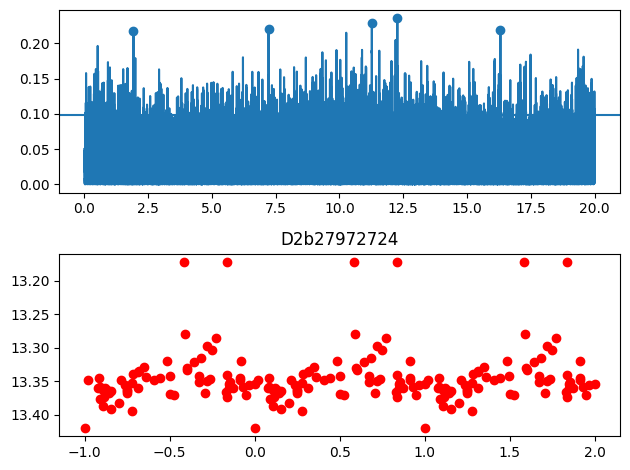

In [522]:
for estrella_nombre in estrellas_filtradas.keys():
    
    estrella = estrellas_filtradas[estrella_nombre]
    frecuencias = estrella['frecuencias']
    intensidad = estrella['intensidad']
    potencia = estrella['potencia']
    fap = estrella['fap']
    tiempos = estrella['tiempos']
    
    pico_mayor = estrella['picos_periodo'][0]
    pico_frecuencia = estrella['picos_frecuencia']
    pico_potencia = estrella['picos_potencia']
        
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(frecuencias,potencia)
    axs[0].axhline(fap)
    axs[0].scatter(pico_frecuencia,pico_potencia)

    fase = [phi(i, tiempos[0], pico_mayor) for i in tiempos]

    fase=np.array(fase)
    axs[1].scatter(fase, intensidad,c="r")
    axs[1].scatter(fase+1, intensidad,c="r")
    axs[1].scatter(fase-1, intensidad,c="r")
    axs[1].set_title('Periodo ' + str(pico_mayor))
    axs[1].invert_yaxis()  # Voltea el eje y

    plt.title(estrella_nombre)
    plt.tight_layout()
    plt.show()

In [523]:
estrellas_filtradas_2 = {}

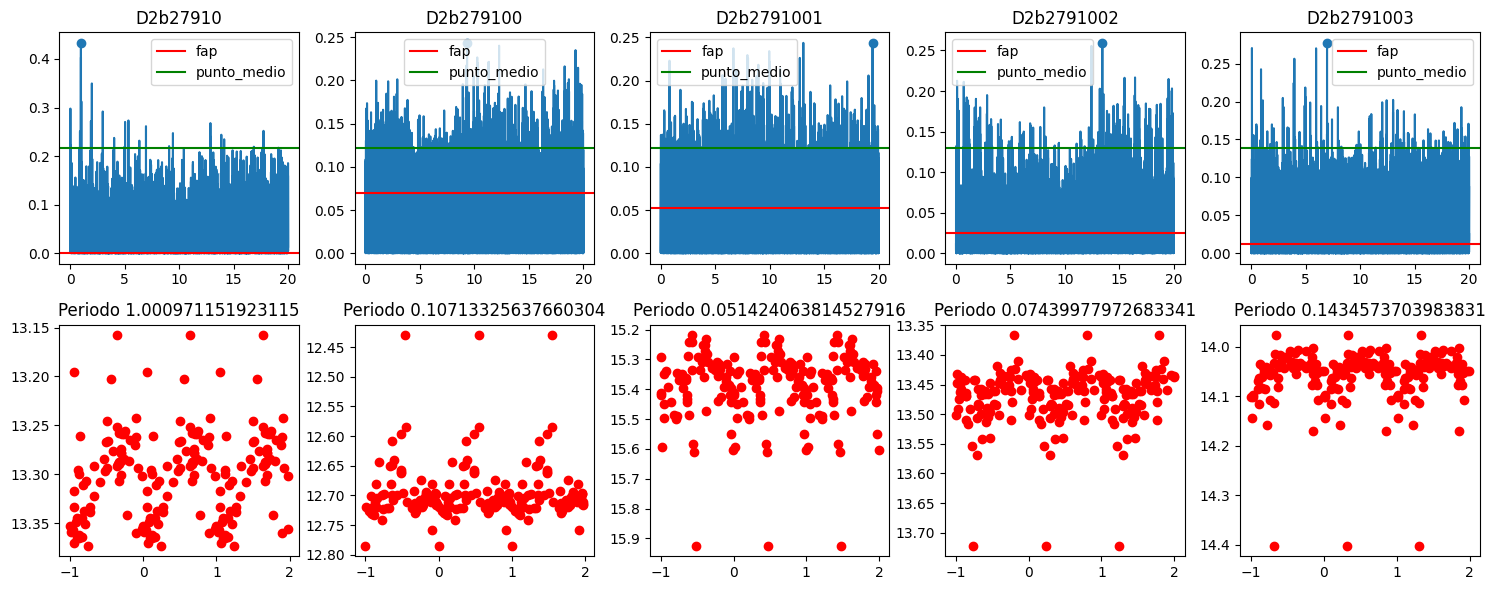

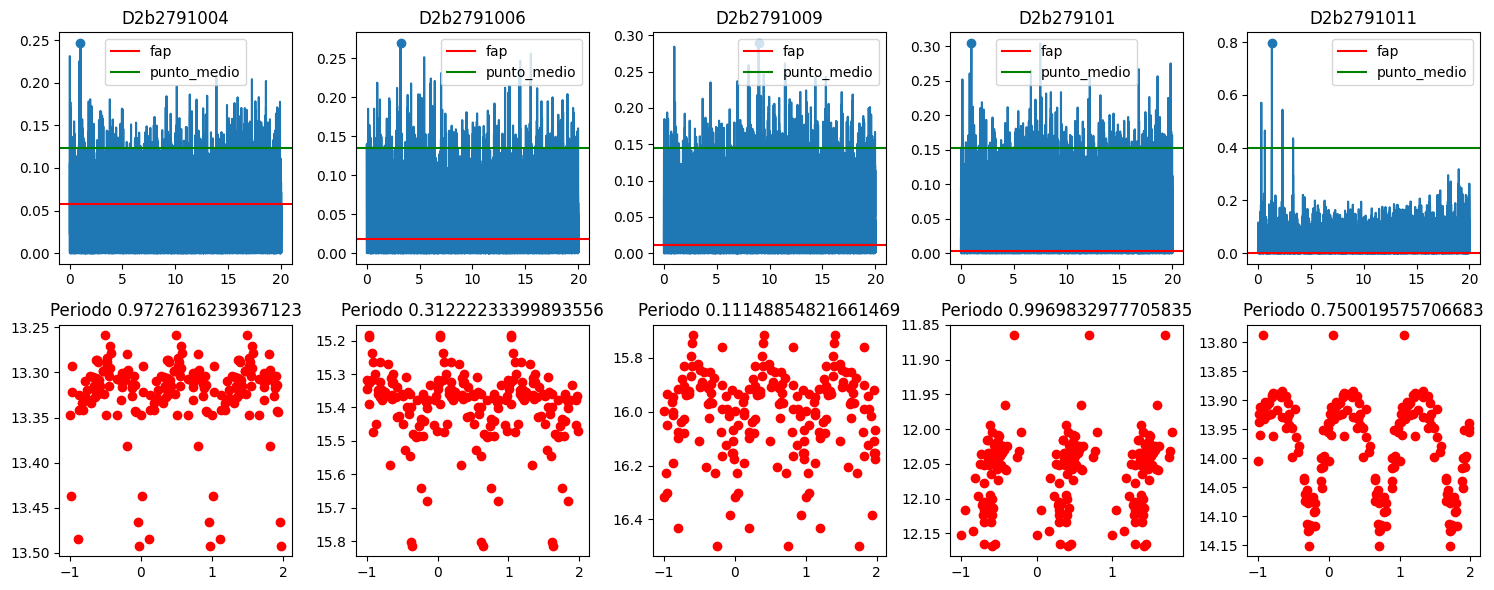

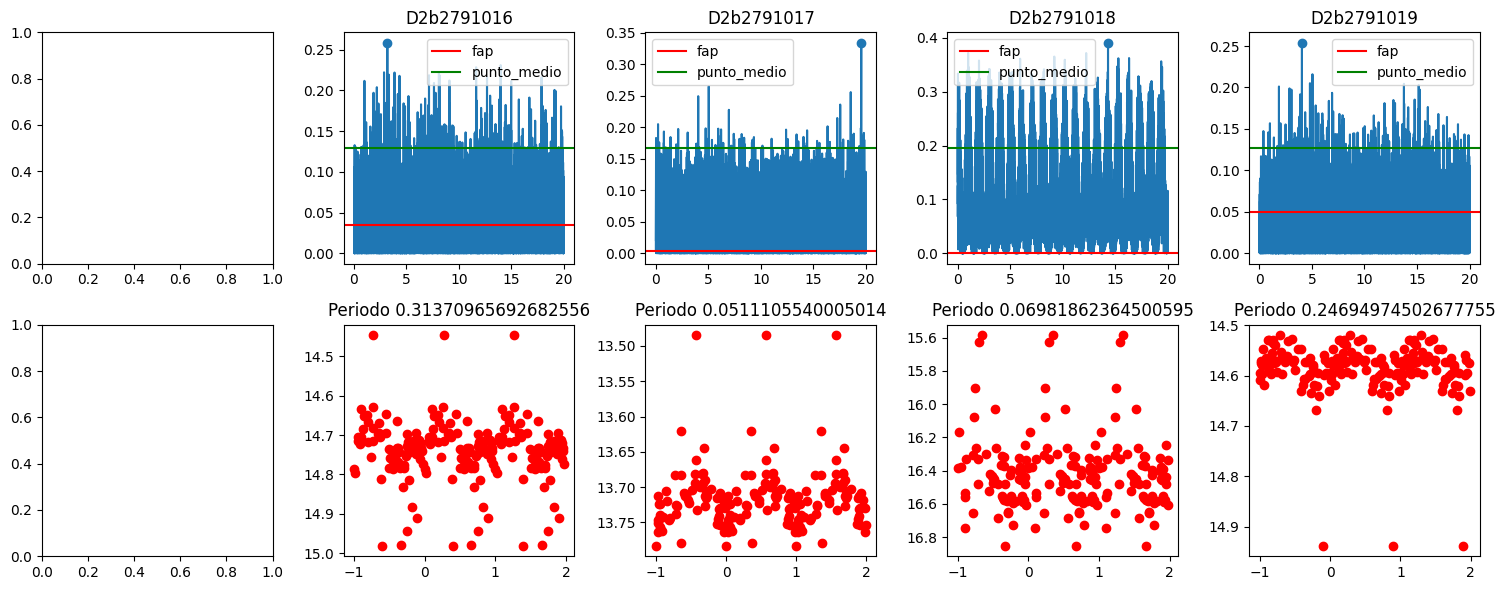

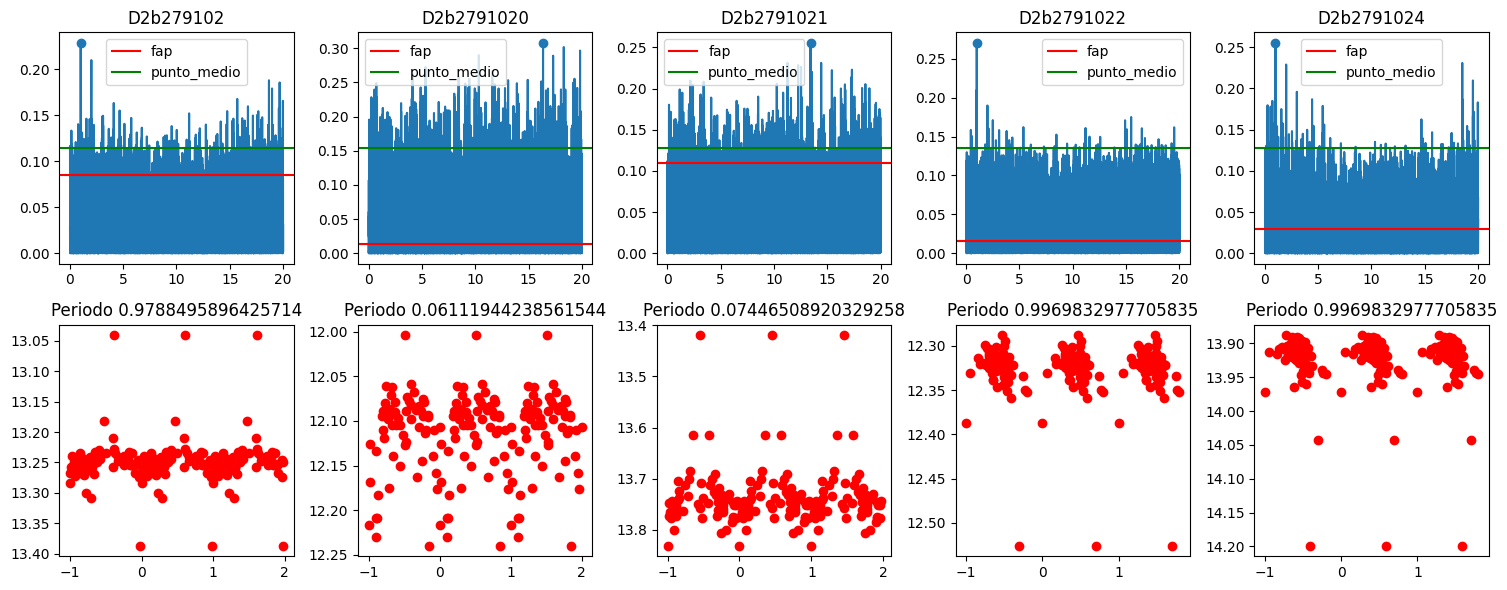

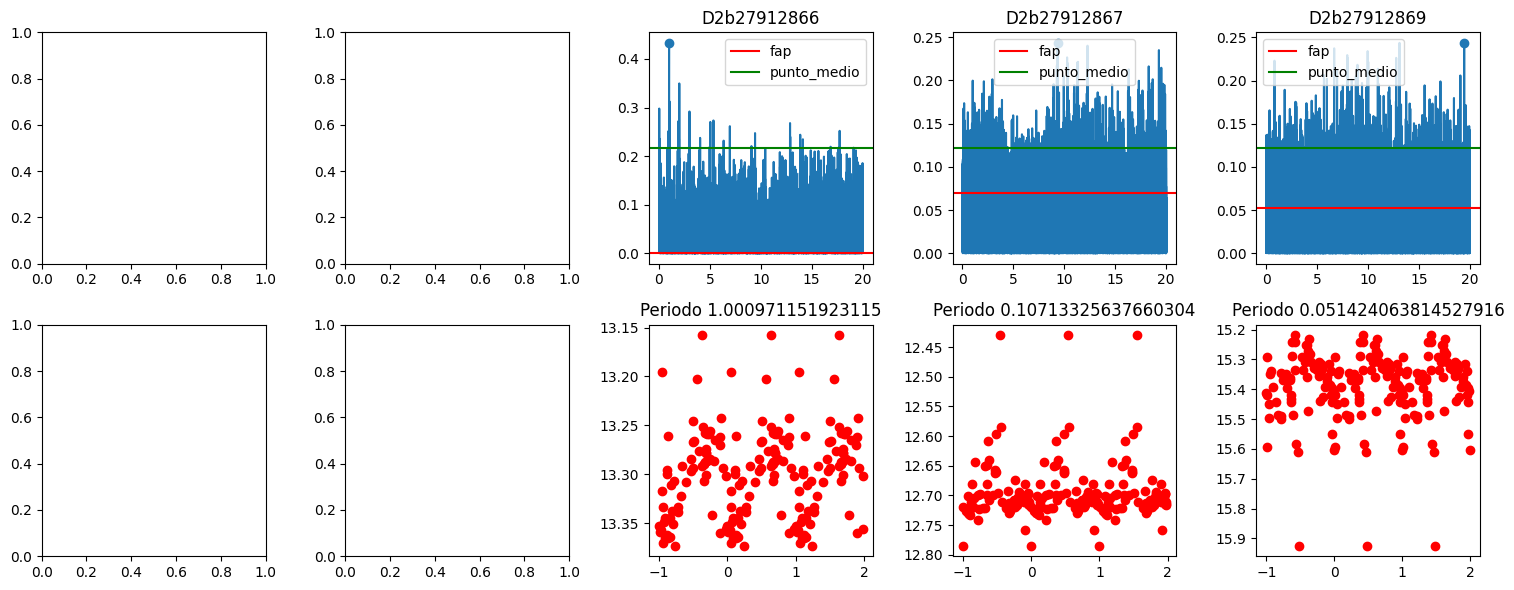

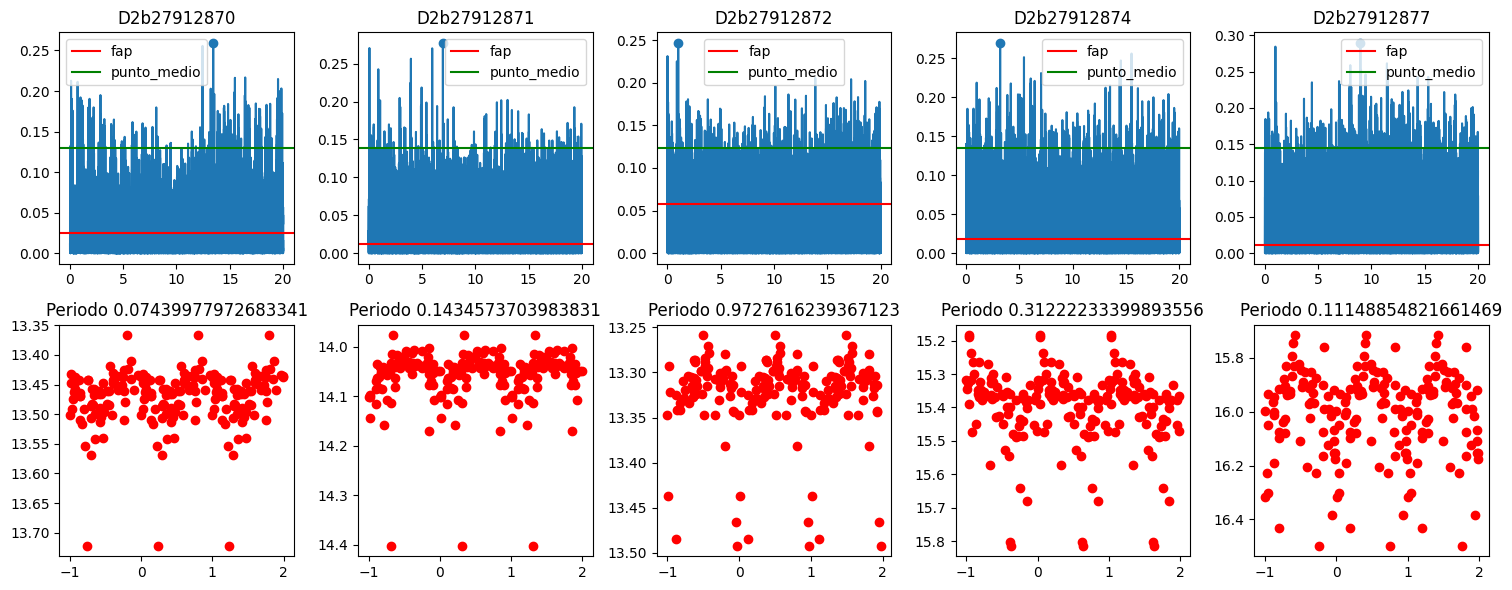

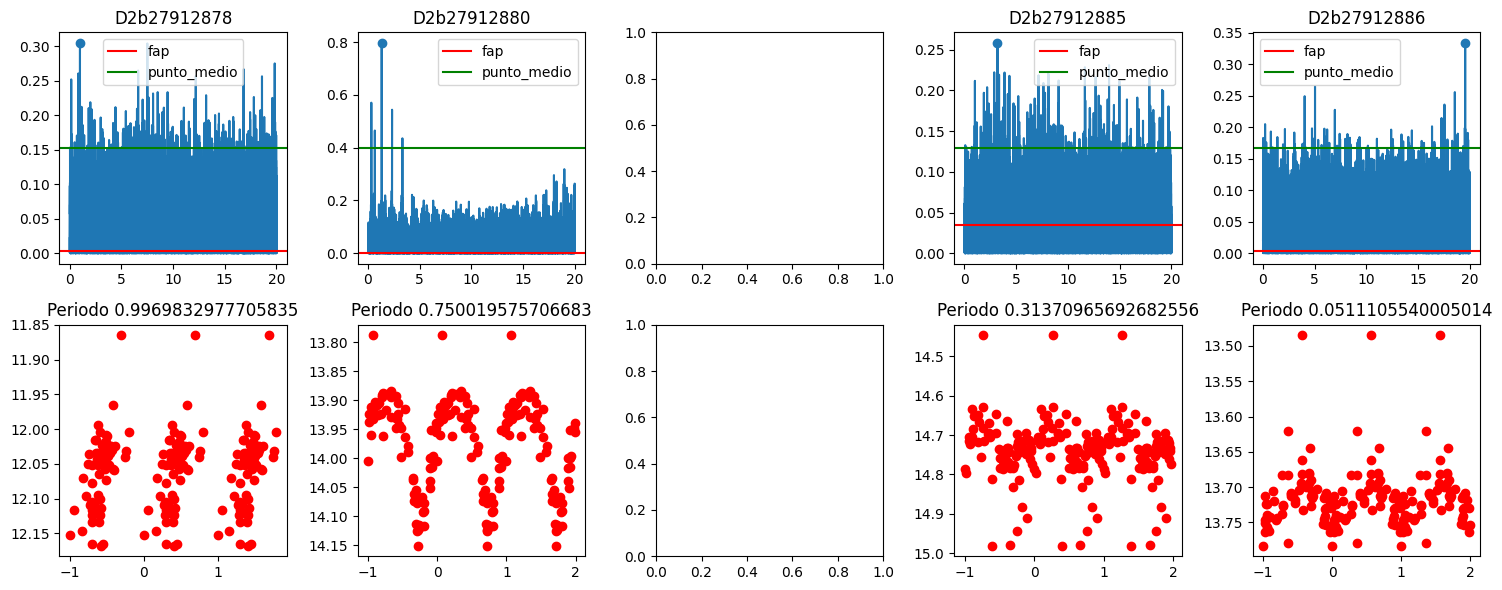

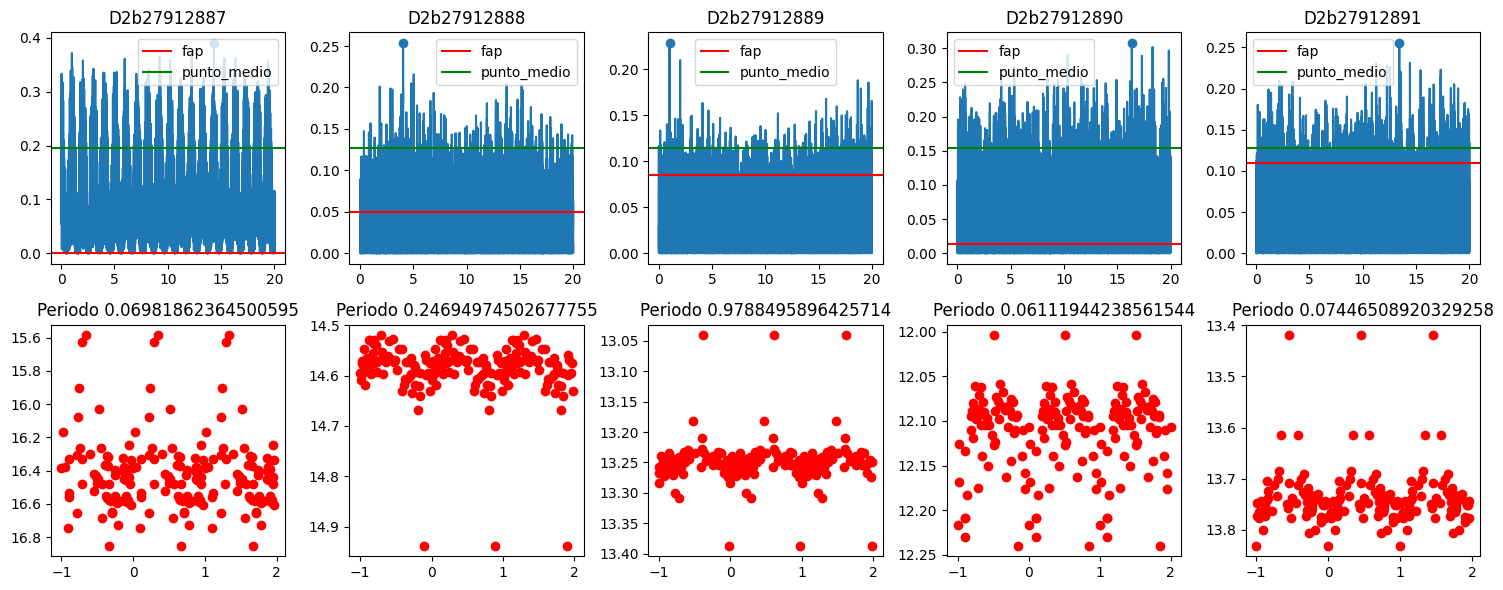

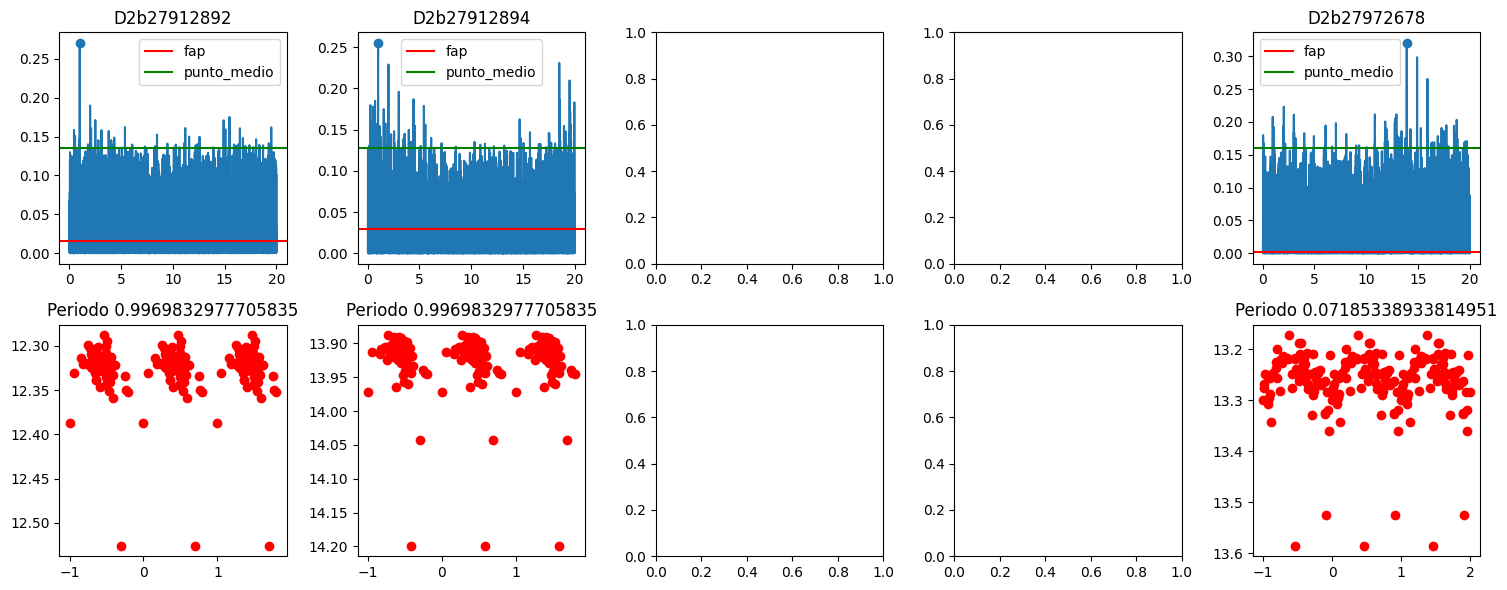

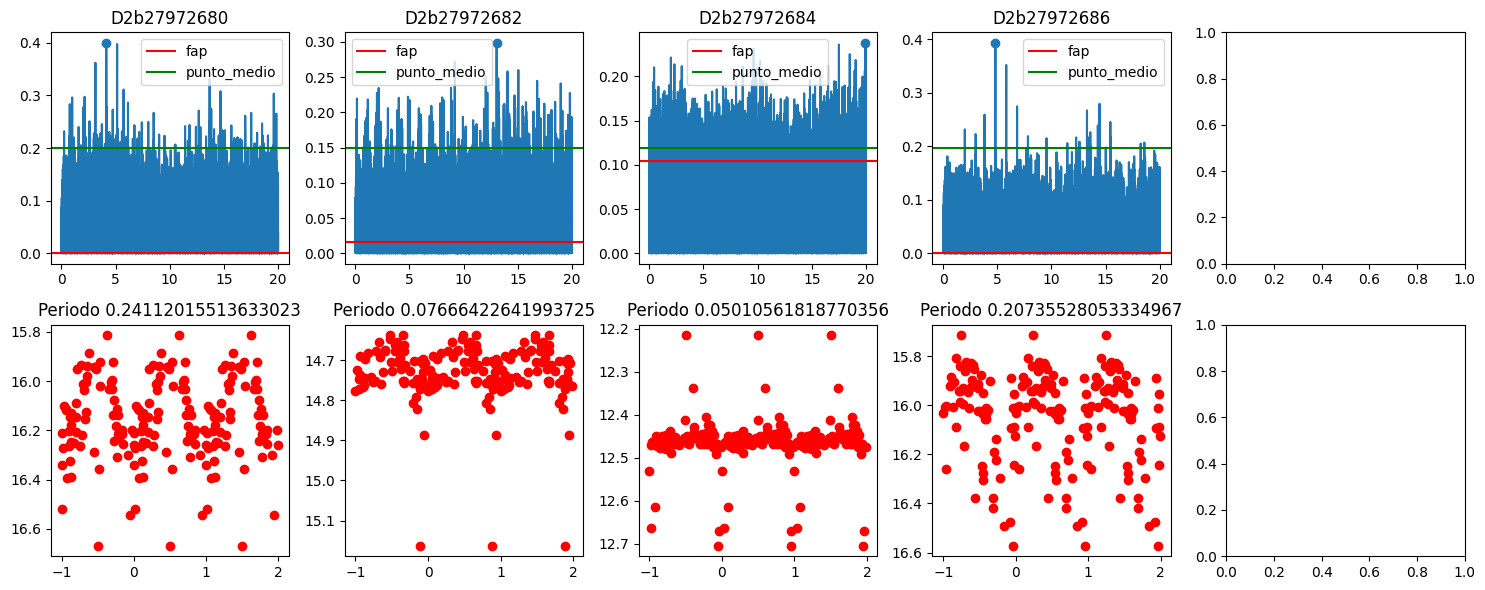

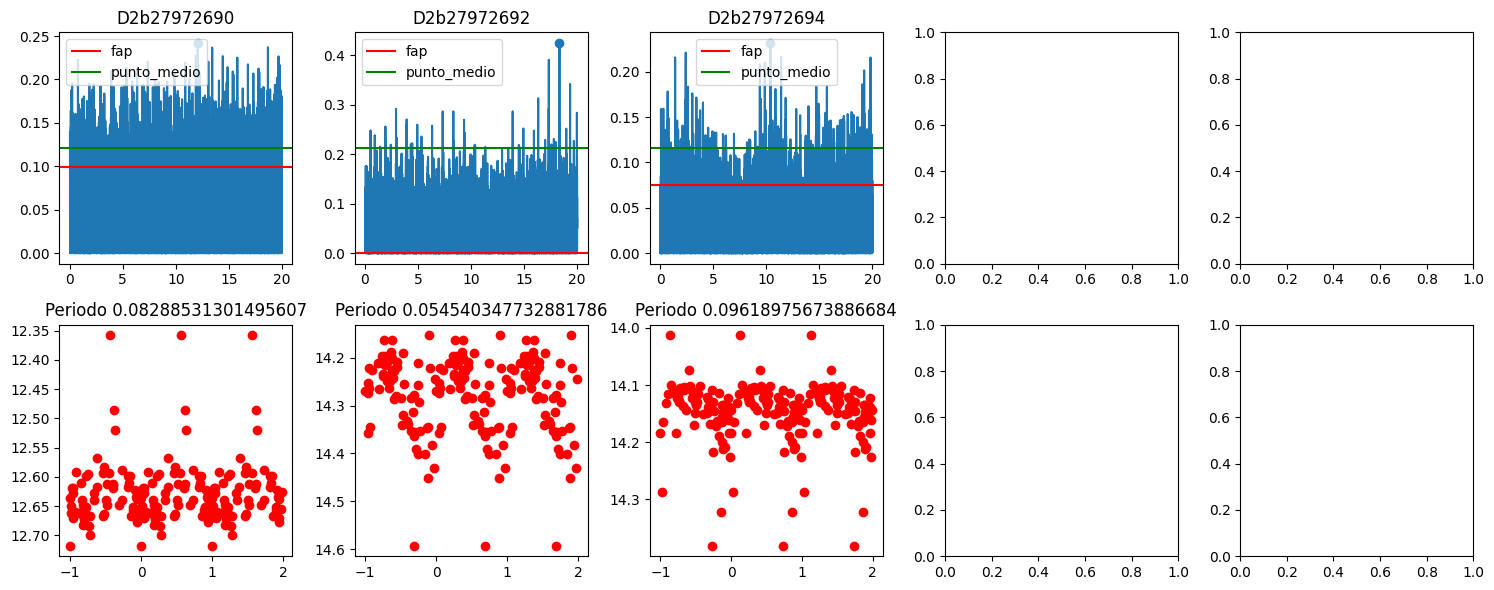

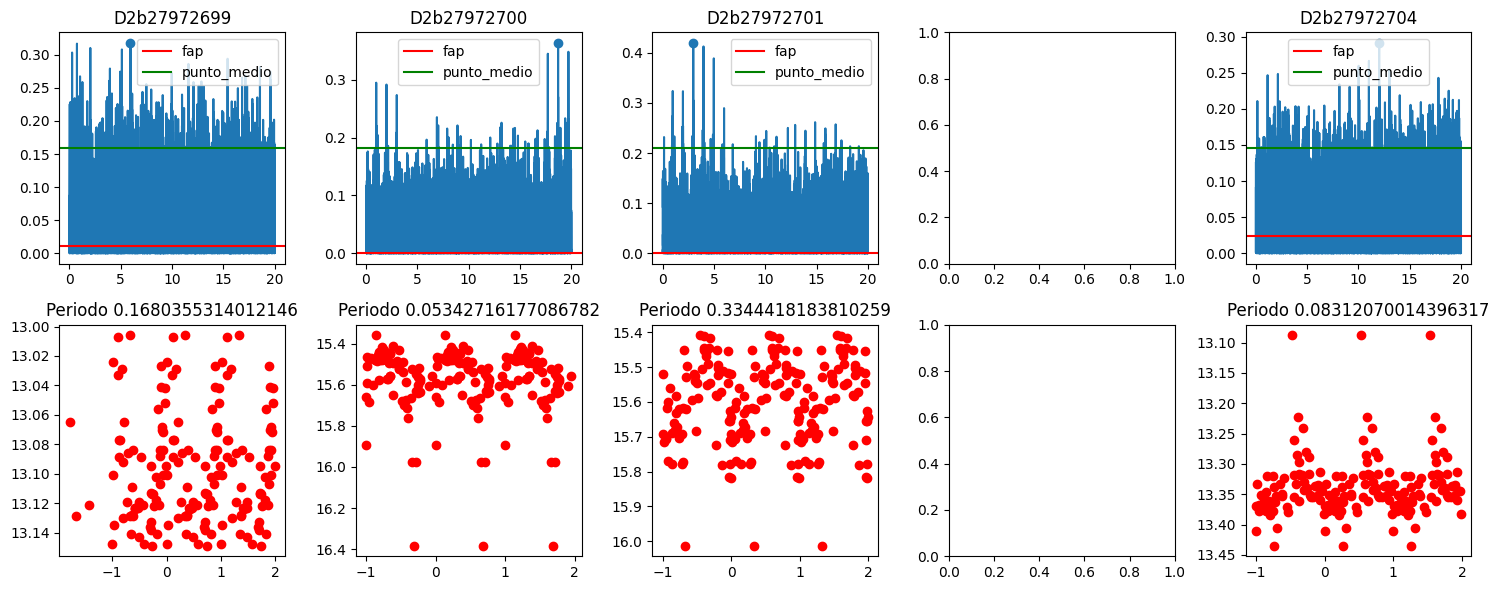

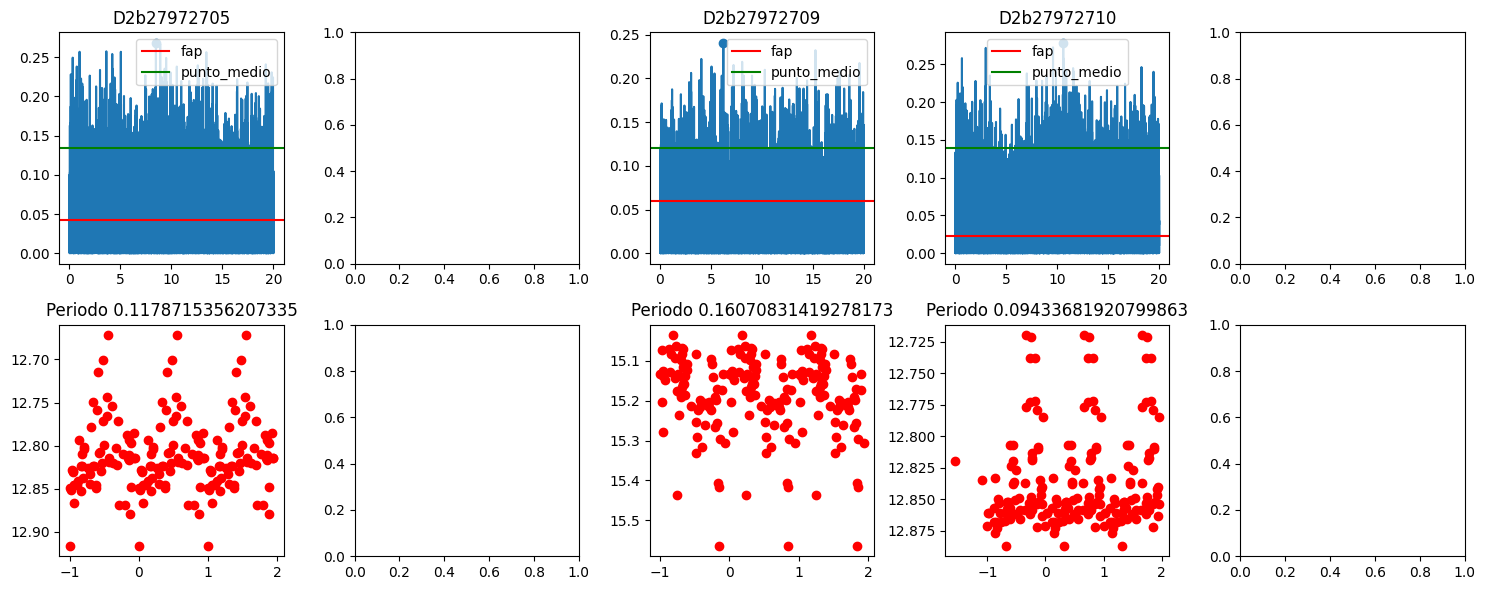

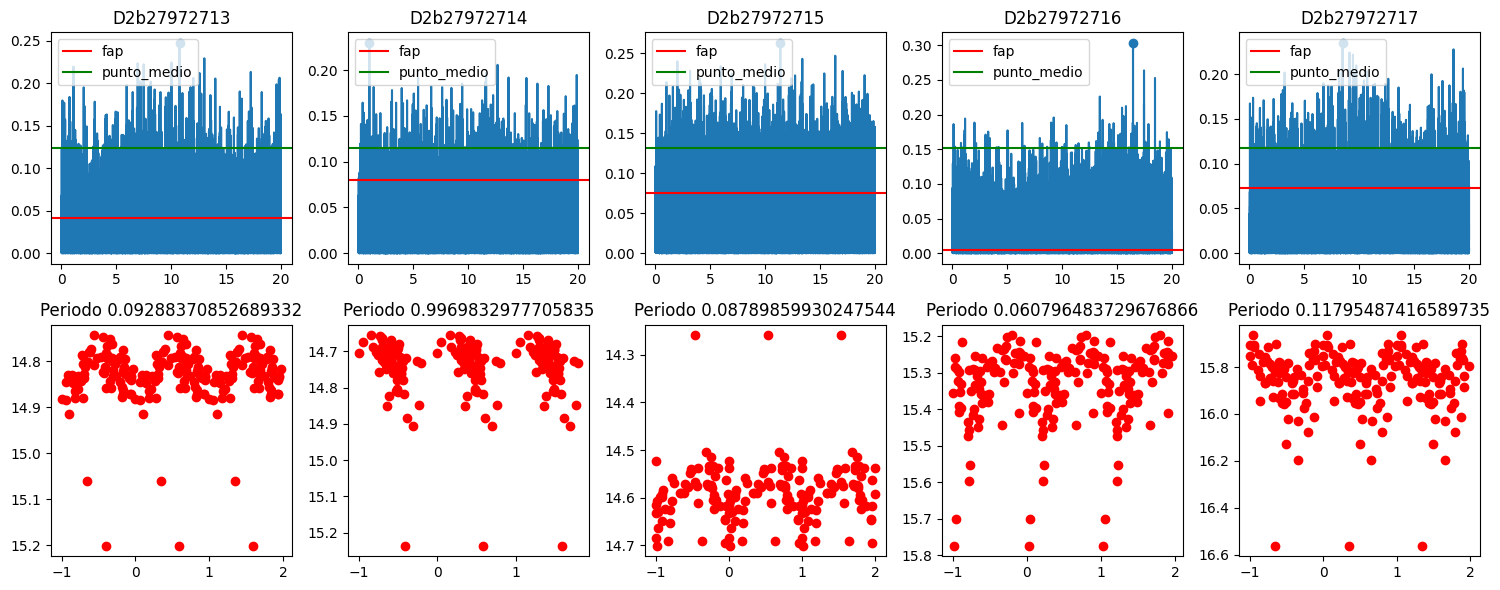

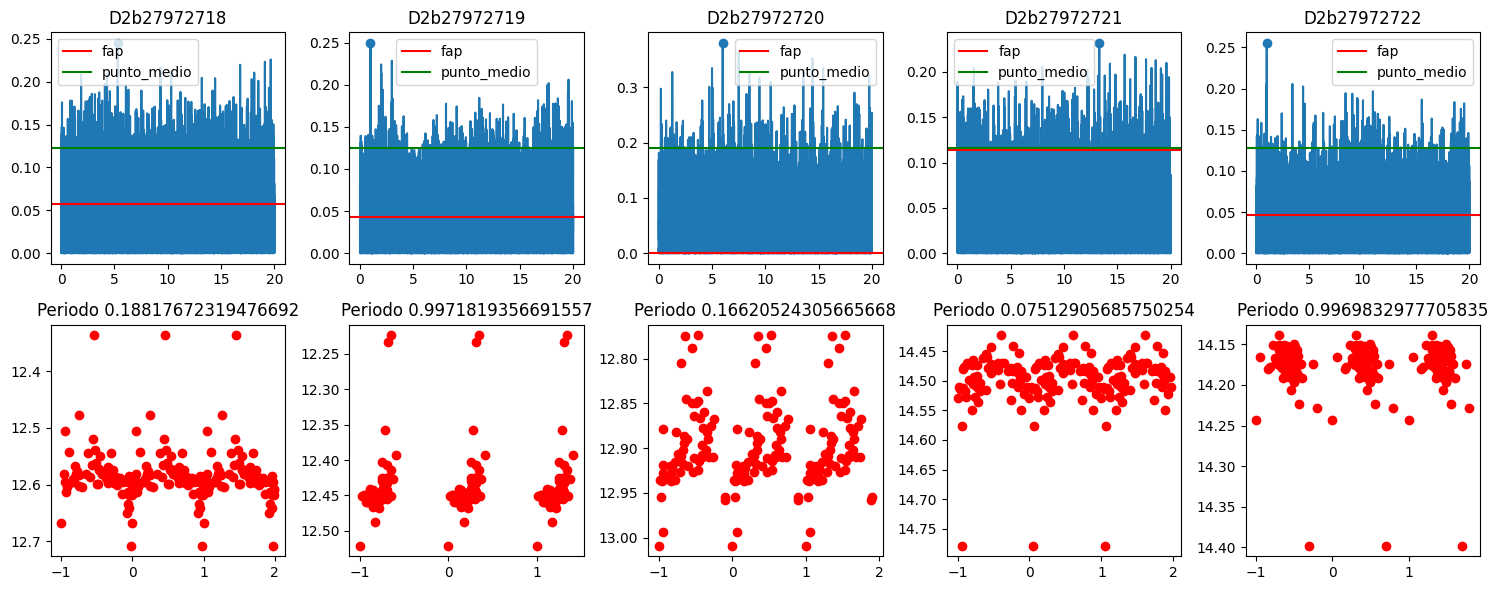

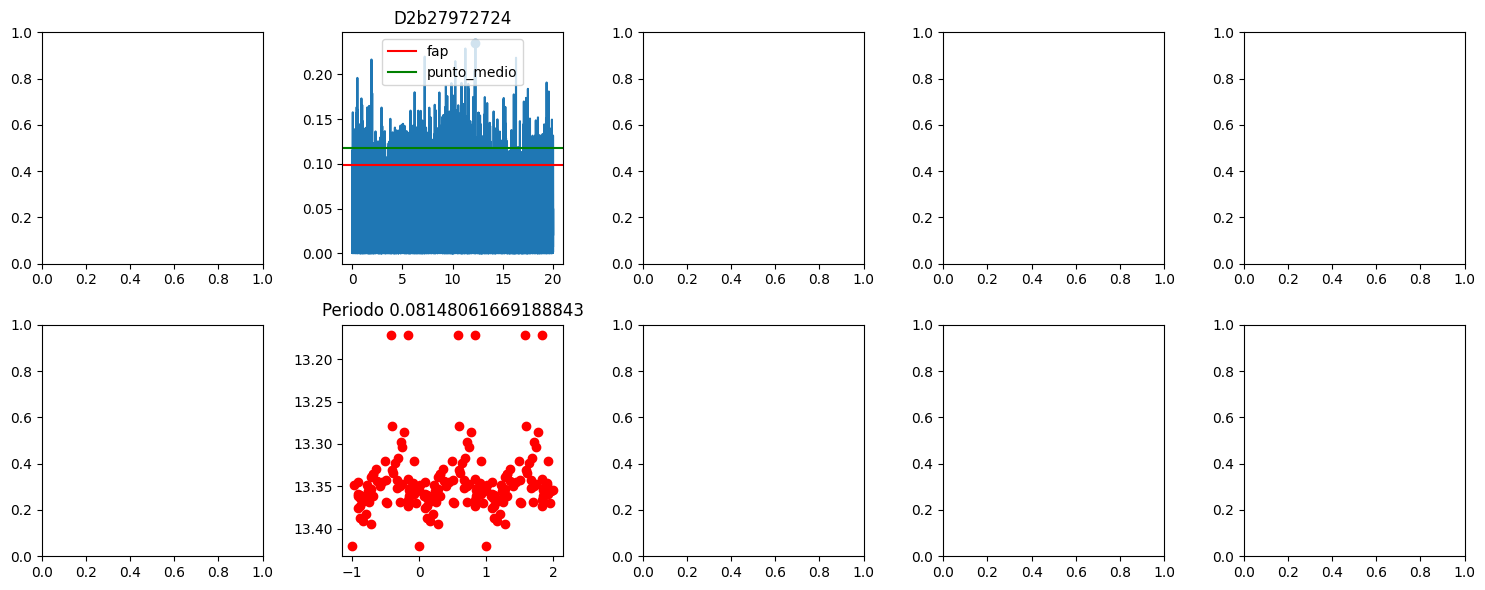

In [524]:
num_estrellas_total = len(estrellas_filtradas.keys())
subplots_por_fila = 5

for i in range(0, num_estrellas_total, subplots_por_fila):
    fig, axs = plt.subplots(2, subplots_por_fila, figsize=(15, 6))
  
    for j, estrella_nombre in enumerate(list(estrellas_filtradas.keys())[i:i+subplots_por_fila]):
        estrella = estrellas_filtradas[estrella_nombre]
        
        potencia = estrella['potencia']
        fap = estrella['fap']
        frecuencia = estrella['frecuencias']
        pico_mayor = estrella['picos_periodo'][0]
        tiempos = estrella['tiempos']
        intensidad = estrella['intensidad']
        
        punto_medio_potencia = estrella['picos_potencia'][0] / 2
        
        if (punto_medio_potencia > fap):
     
            ax_potencia = axs[0, j]
            ax_potencia.plot(frecuencia, potencia)
            ax_potencia.scatter(estrella['picos_frecuencia'][0], estrella['picos_potencia'][0])
            ax_potencia.axhline(fap, c='red', label='fap')
            ax_potencia.axhline(punto_medio_potencia, c='green', label='punto_medio')
            ax_potencia.legend()
            ax_potencia.set_title(estrella_nombre)
            
            fase = [phi(k, tiempos[0], pico_mayor) for k in tiempos]
            fase = np.array(fase)
            ax_intensidad = axs[1, j]
            ax_intensidad.scatter(fase, intensidad, c="r")
            ax_intensidad.scatter(fase + 1, intensidad, c="r")
            ax_intensidad.scatter(fase - 1, intensidad, c="r")
            ax_intensidad.set_title('Periodo ' + str(pico_mayor))
            ax_intensidad.invert_yaxis()  # Voltea el eje y
            
            estrellas_filtradas_2[estrella_nombre] = estrella
    
    plt.tight_layout()
    plt.show()


In [525]:
len(estrellas_filtradas_2.keys())

64

In [526]:
estrellas_filtradas_3 = {}

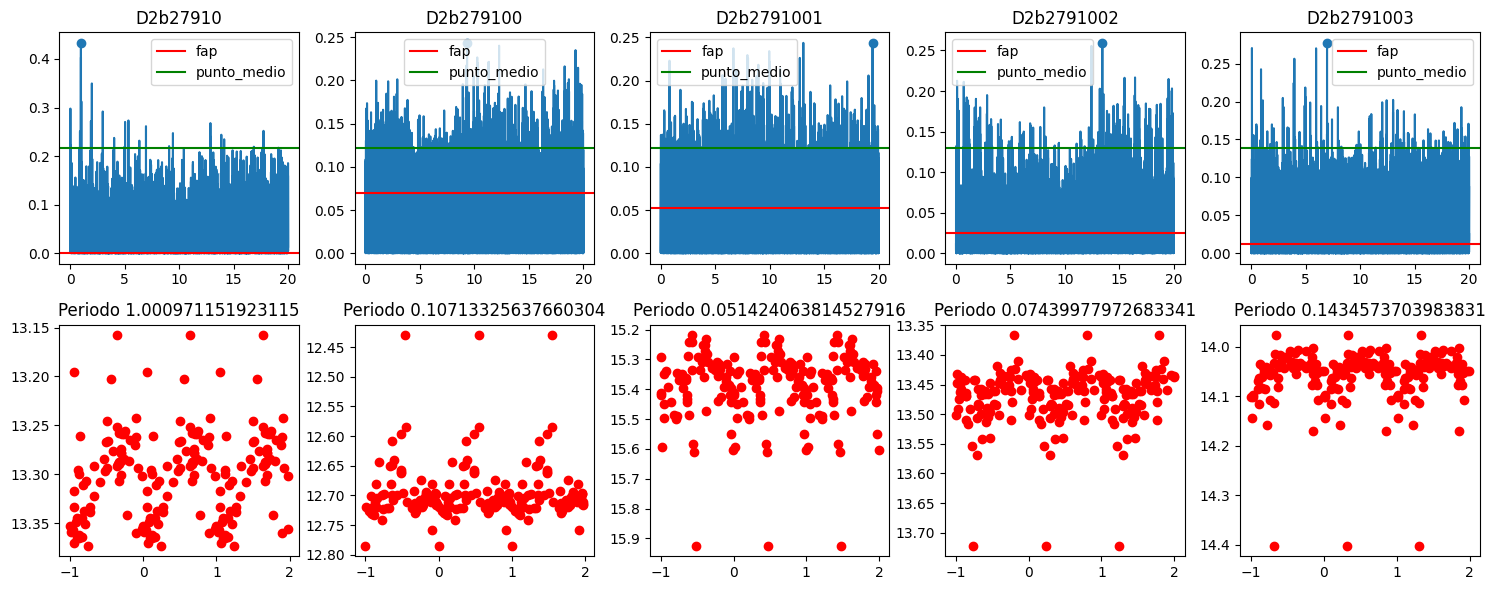

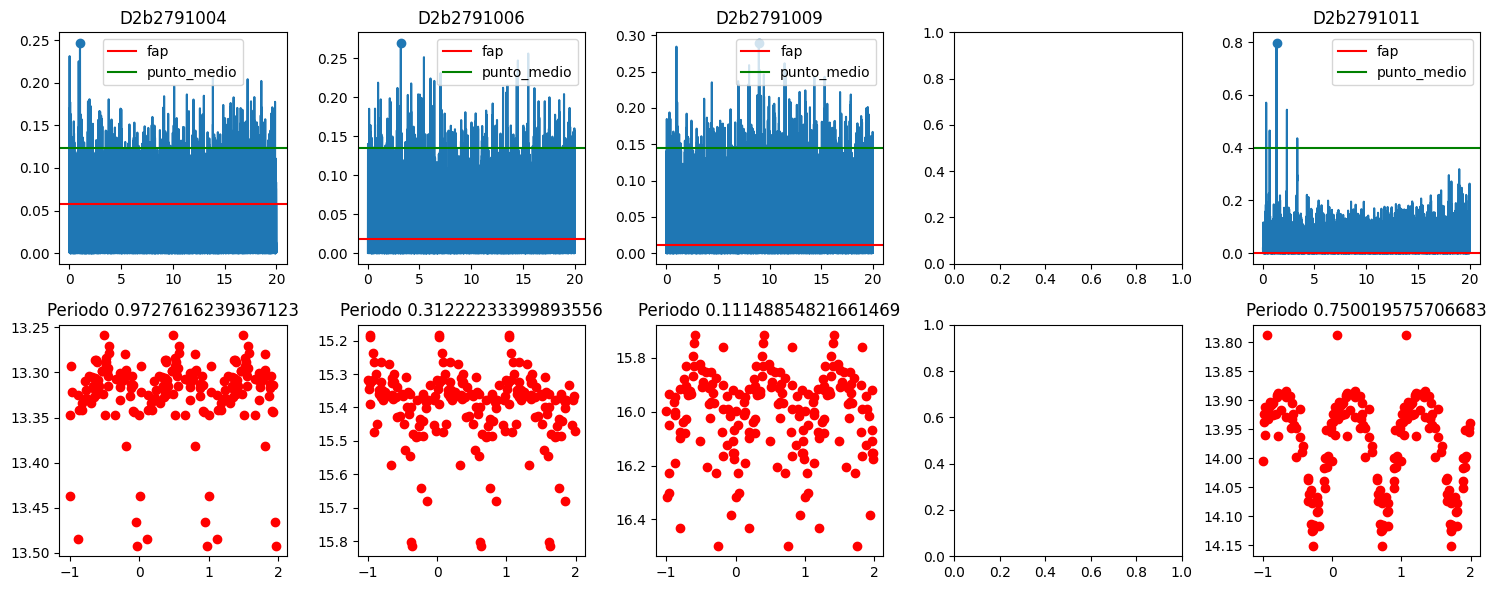

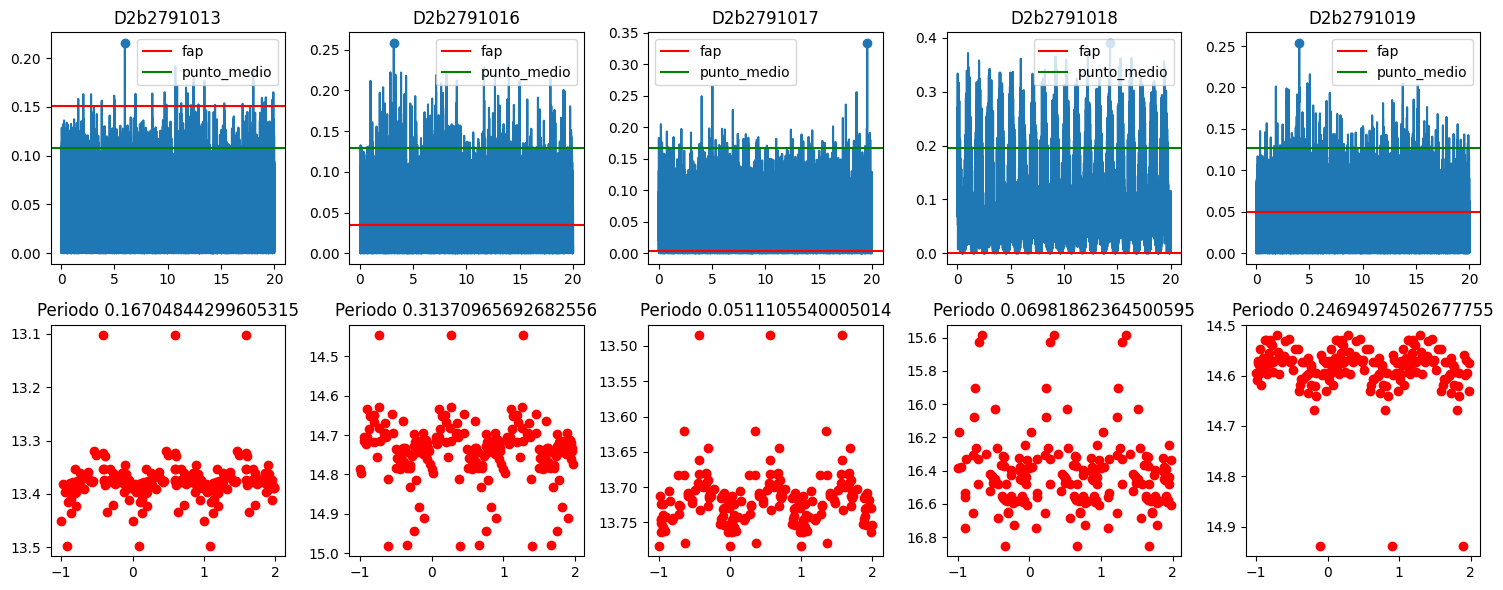

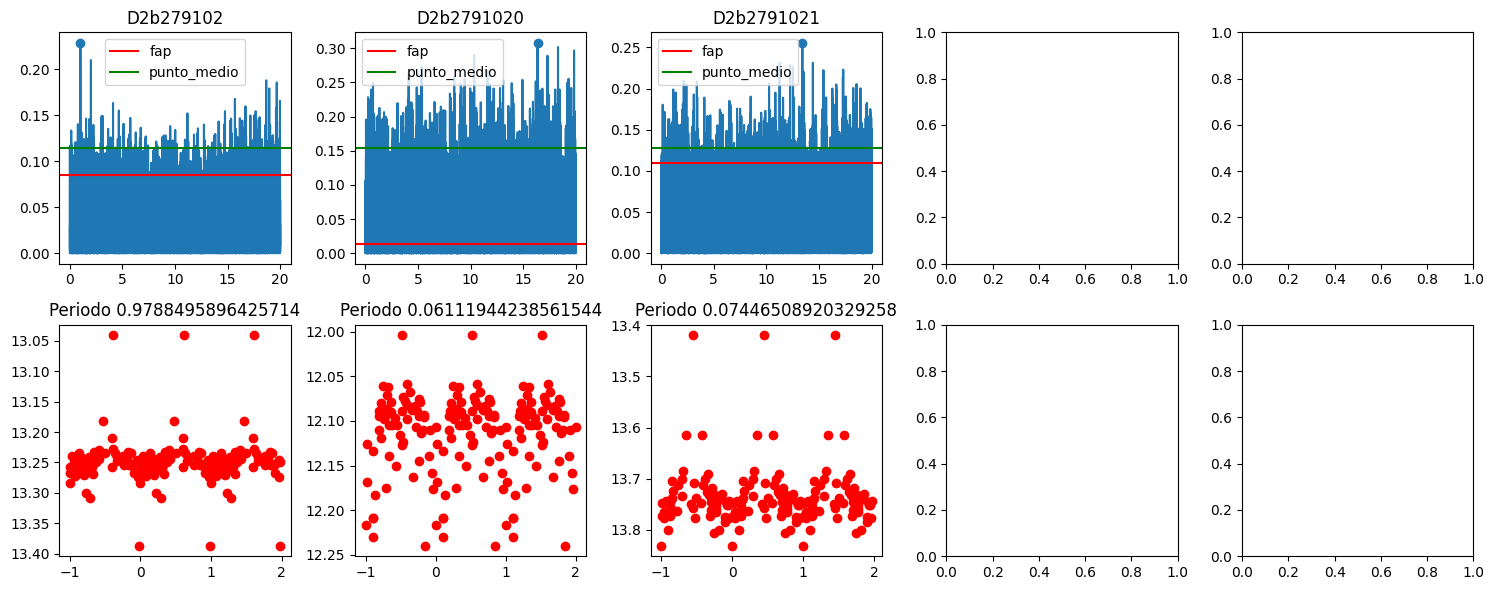

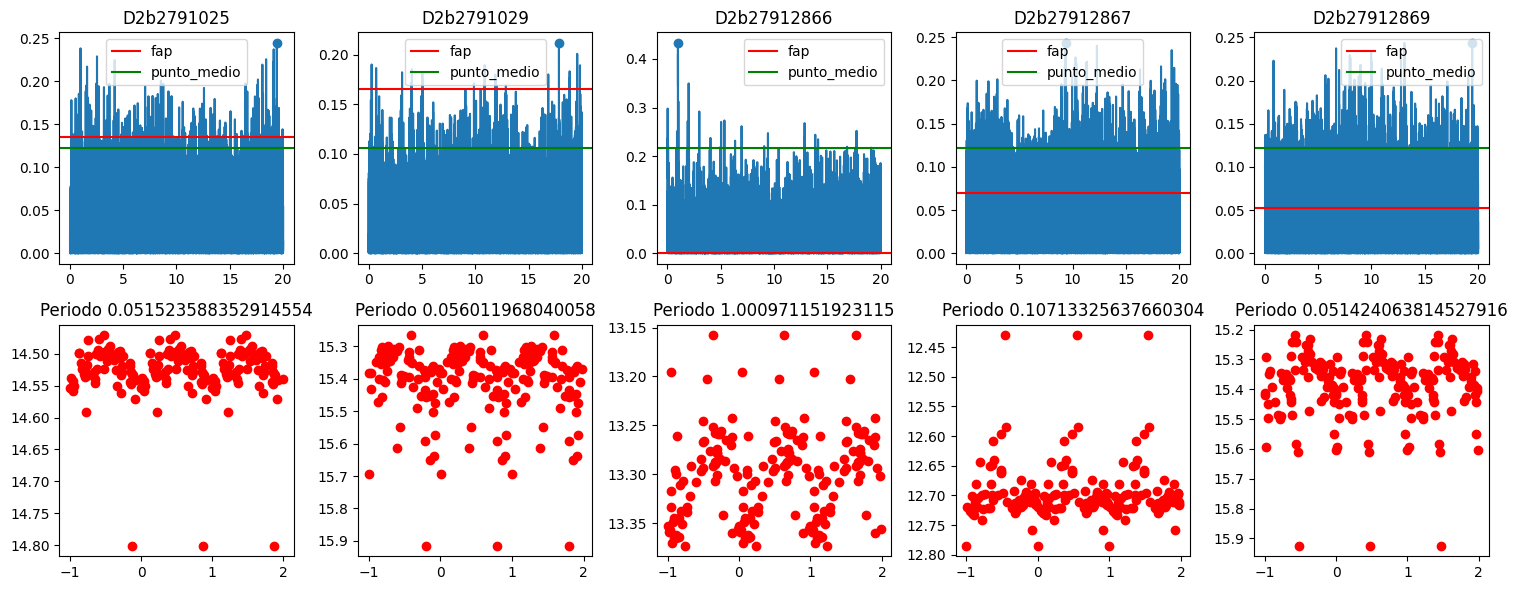

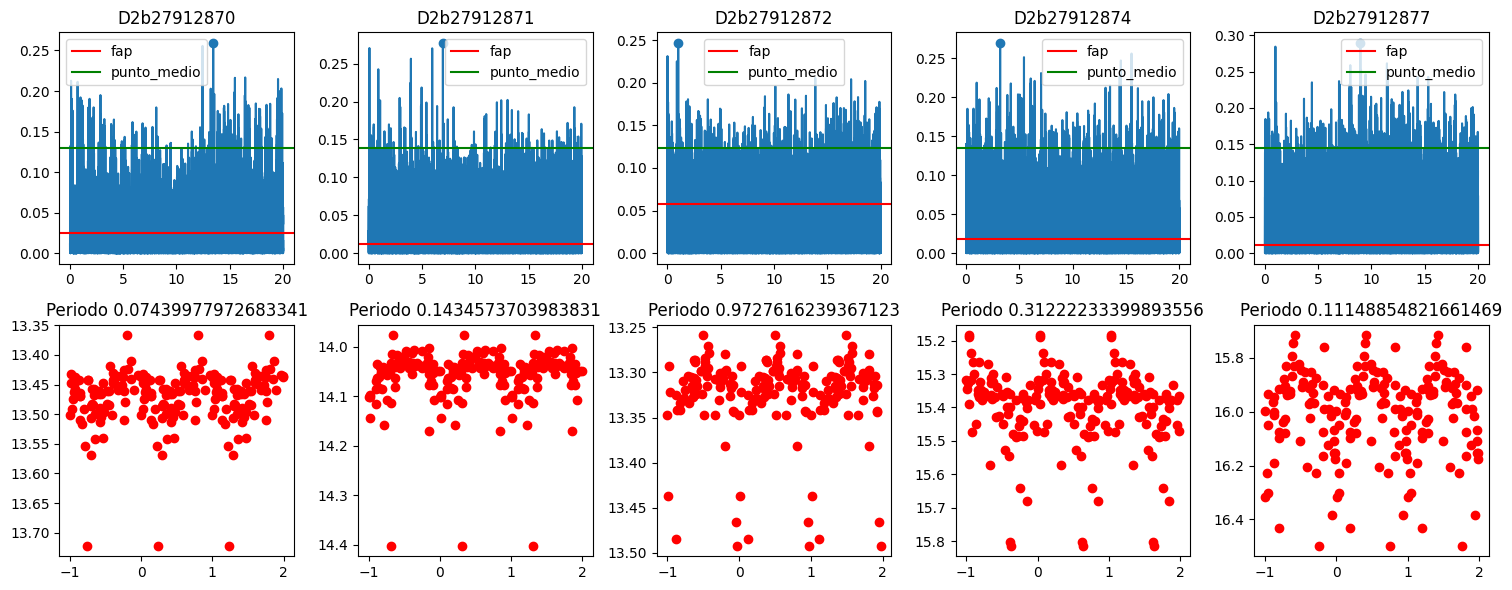

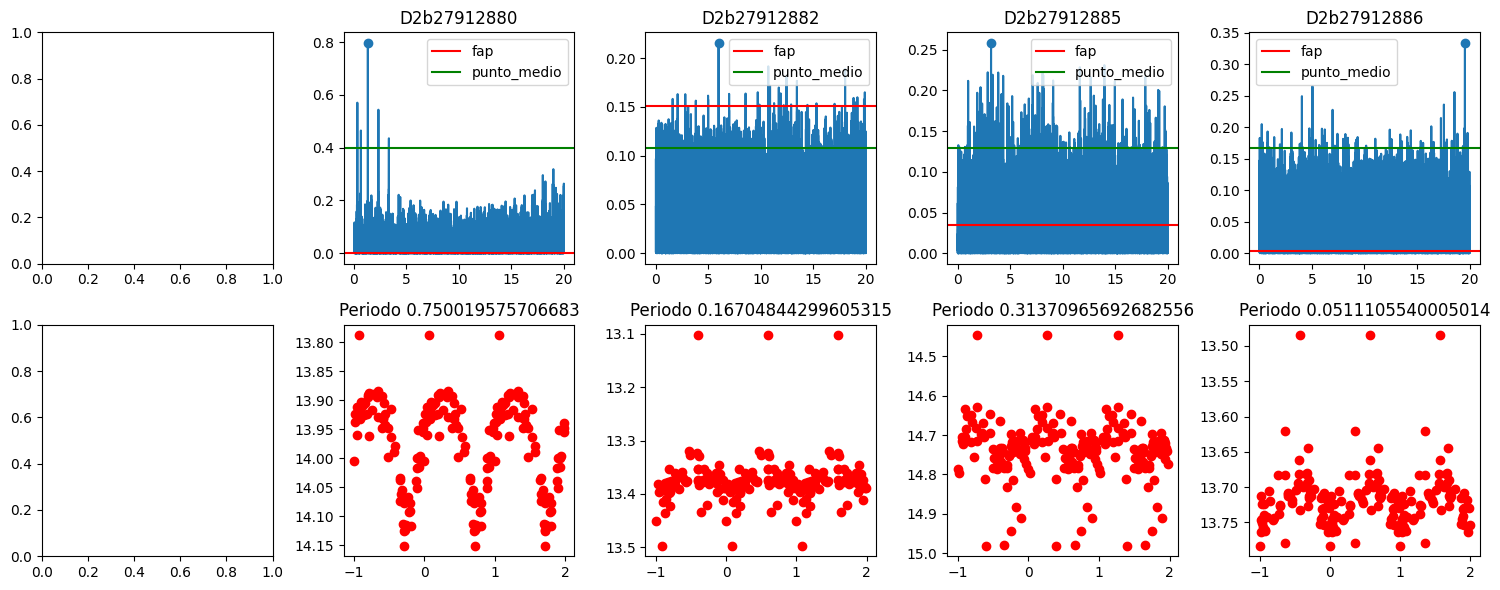

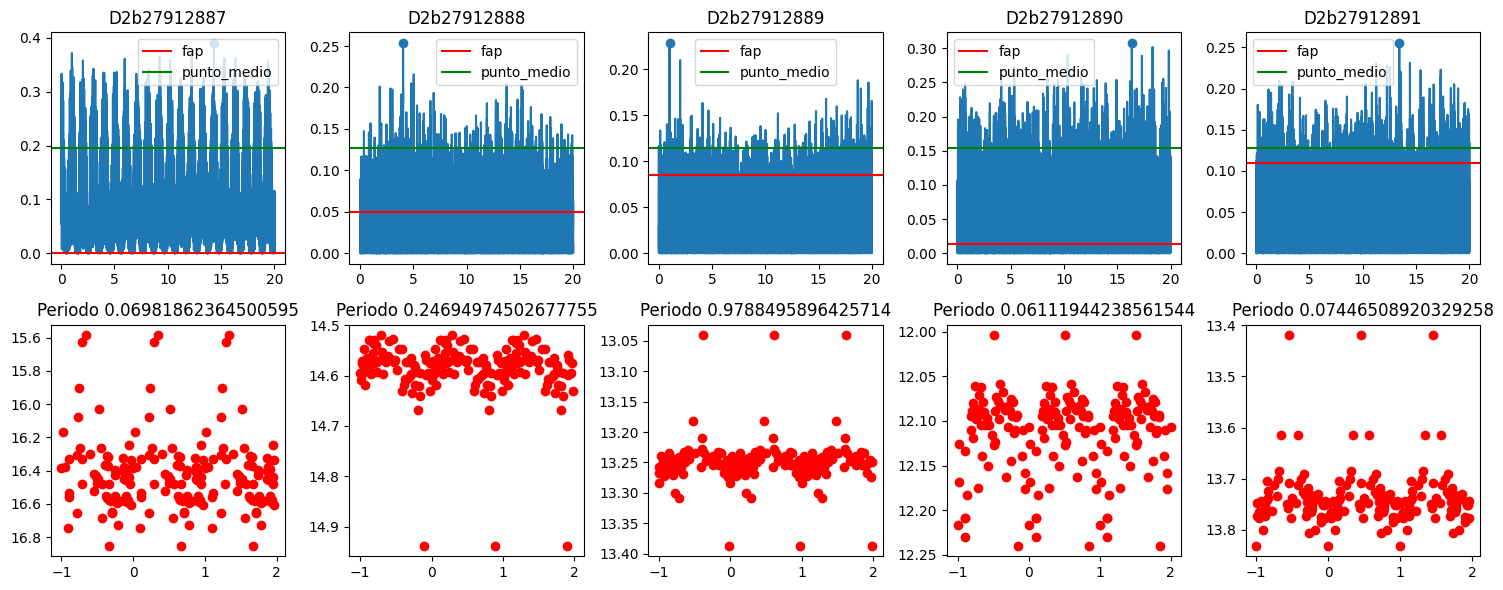

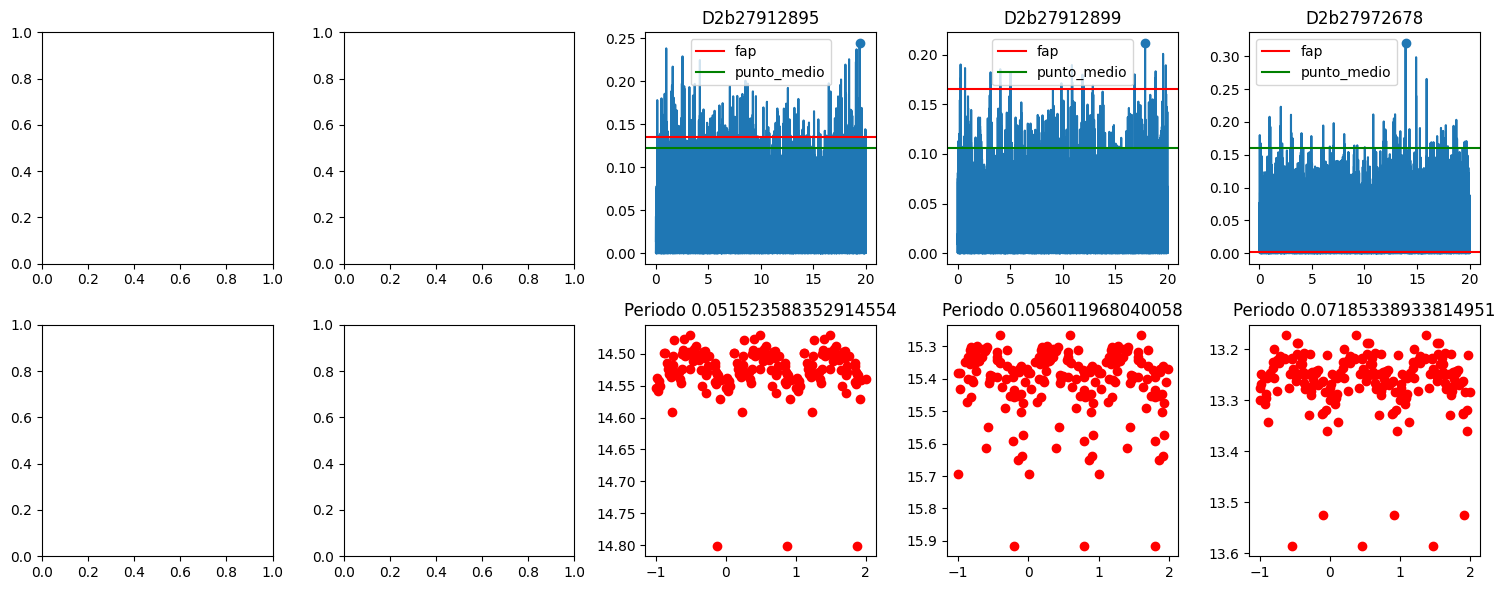

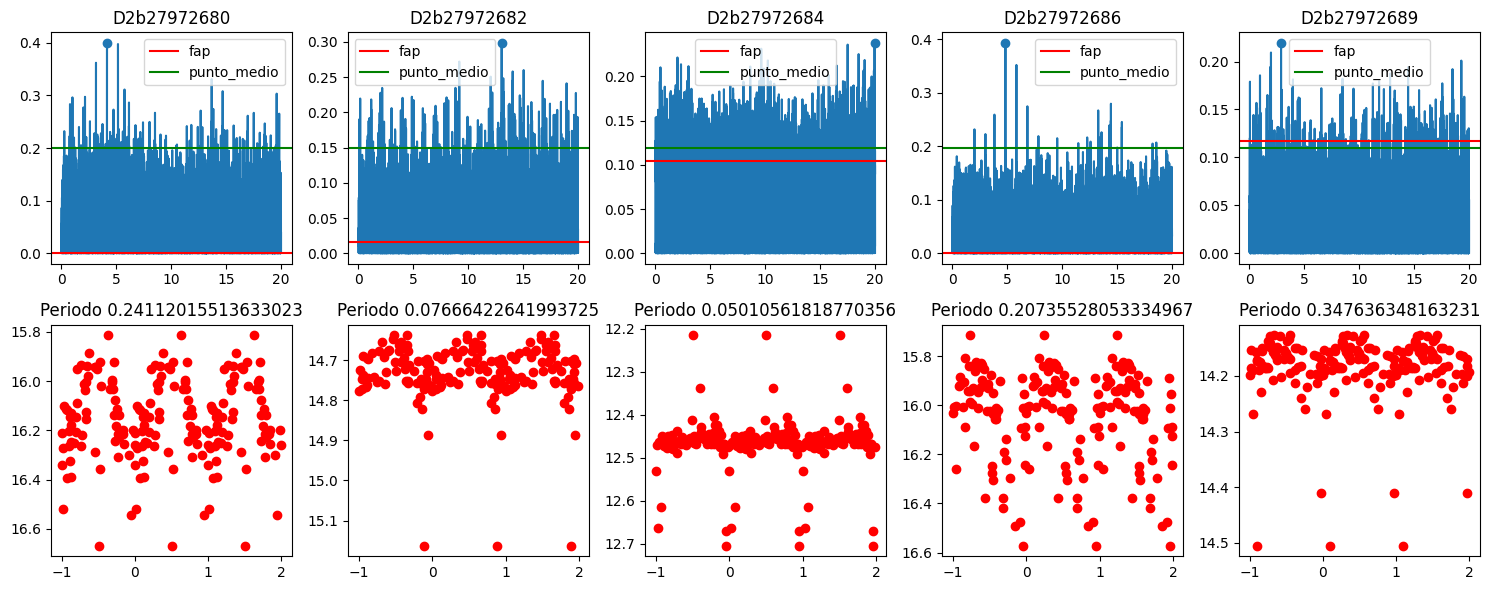

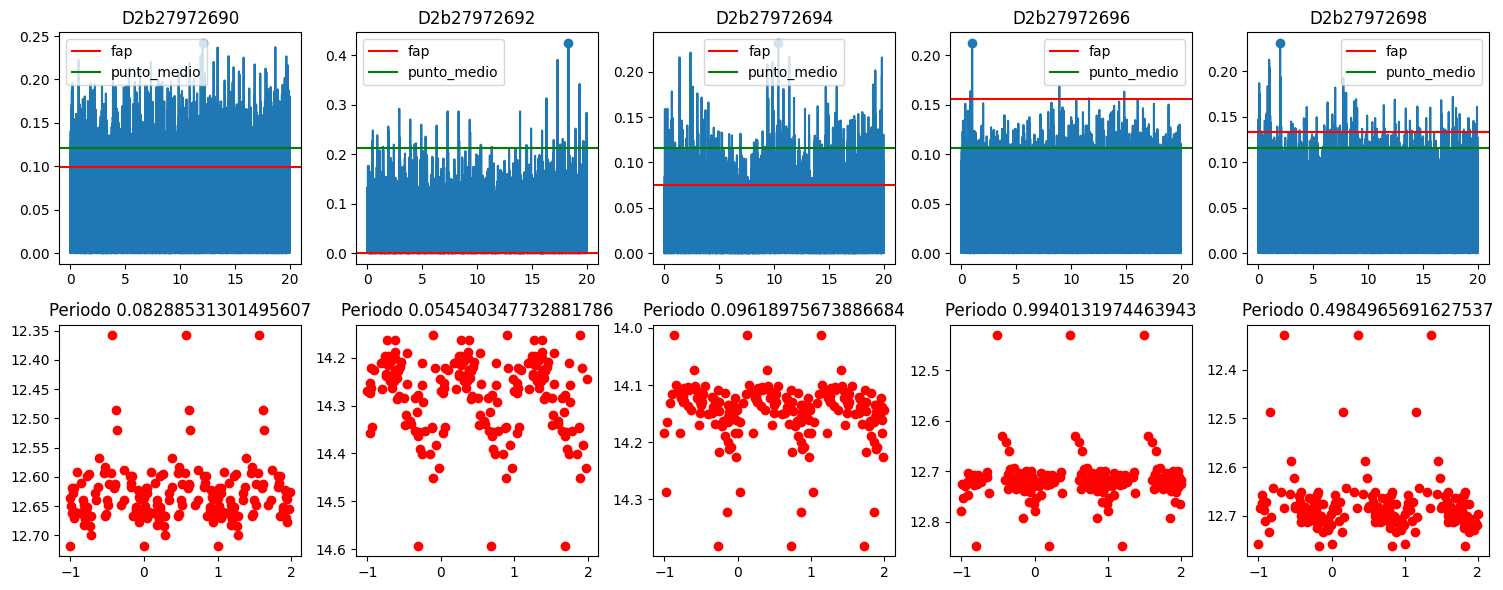

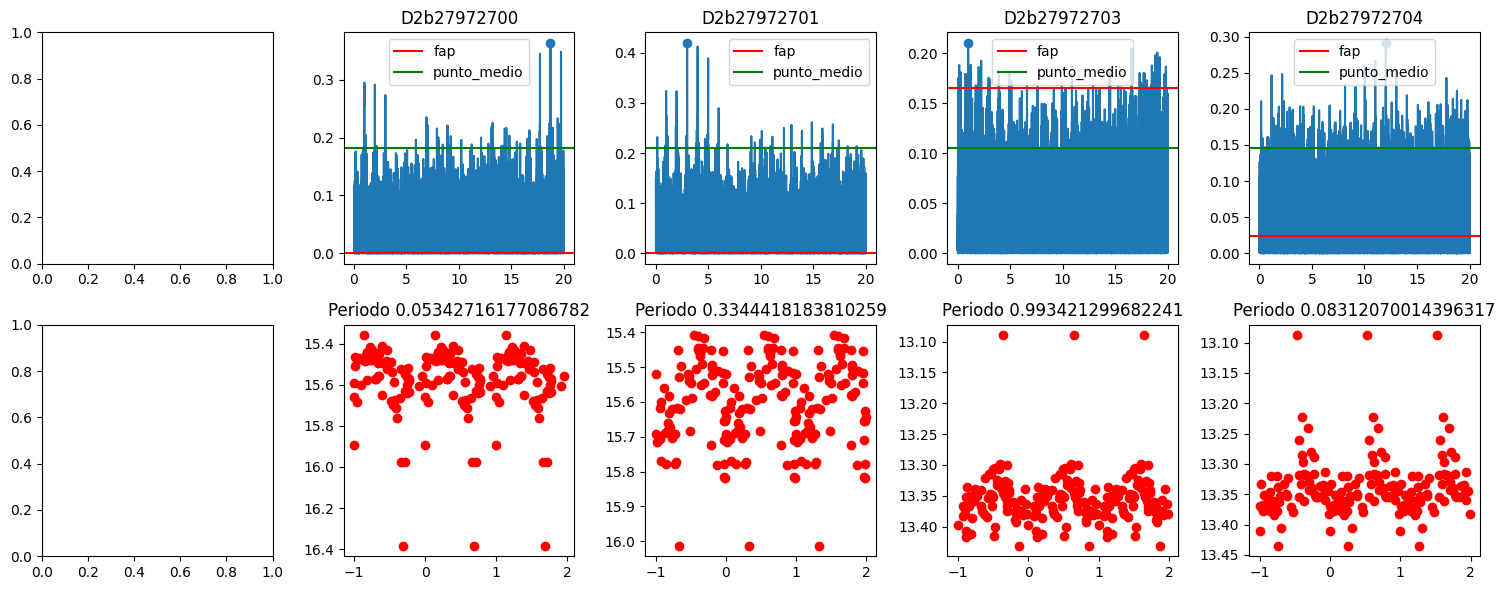

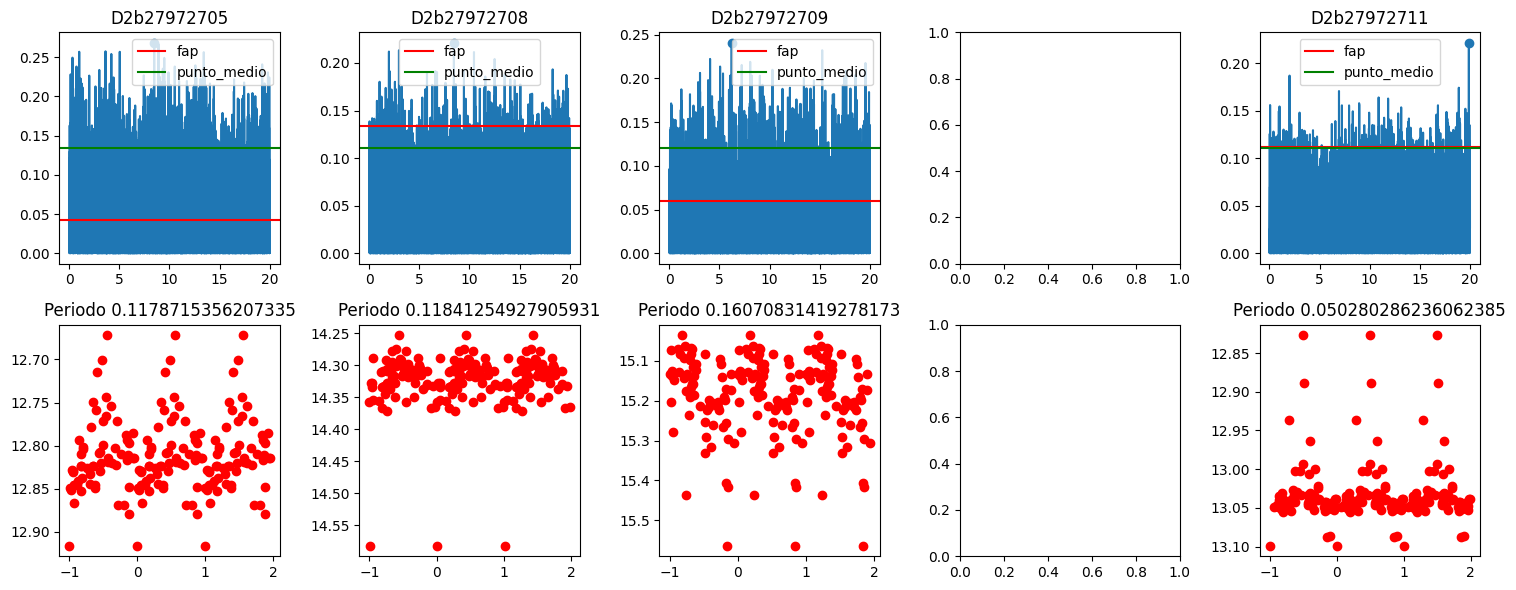

In [527]:
num_estrellas_total = len(estrellas_filtradas_2.keys())
subplots_por_fila = 5

for i in range(0, num_estrellas_total, subplots_por_fila):
    fig, axs = plt.subplots(2, subplots_por_fila, figsize=(15, 6))
  
    for j, estrella_nombre in enumerate(list(estrellas_filtradas.keys())[i:i+subplots_por_fila]):
        estrella = estrellas_filtradas[estrella_nombre]
        
        potencia = estrella['potencia']
        fap = estrella['fap']
        frecuencia = estrella['frecuencias']
        pico_mayor = estrella['picos_periodo'][0]
        tiempos = estrella['tiempos']
        intensidad = estrella['intensidad']
        fase = [phi(k, tiempos[0], pico_mayor) for k in tiempos]
        fase = np.array(fase)
        punto_medio_potencia = estrella['picos_potencia'][0] / 2
        
        q = abs(np.array(fase).min() +1 - np.array(fase).max())
        
        if (q < 0.2):
     
            ax_potencia = axs[0, j]
            ax_potencia.plot(frecuencia, potencia)
            ax_potencia.scatter(estrella['picos_frecuencia'][0], estrella['picos_potencia'][0])
            ax_potencia.axhline(fap, c='red', label='fap')
            ax_potencia.axhline(punto_medio_potencia, c='green', label='punto_medio')
            ax_potencia.legend()
            ax_potencia.set_title(estrella_nombre)
            
            
            ax_intensidad = axs[1, j]
            ax_intensidad.scatter(fase, intensidad, c="r")
            ax_intensidad.scatter(fase + 1, intensidad, c="r")
            ax_intensidad.scatter(fase - 1, intensidad, c="r")
            ax_intensidad.set_title('Periodo ' + str(pico_mayor))
            ax_intensidad.invert_yaxis()  # Voltea el eje y
            
            estrellas_filtradas_3[estrella_nombre] = estrella
    
    plt.tight_layout()
    plt.show()

In [528]:
len(estrellas_filtradas_3.keys())

57

In [529]:
lista_llaves_borrar = ['D2b27972711','D2b27972708','D2b27972703', 'D2b27972700', 'D2b27972698', 'D2b27972696', 'D2b27972694', 'D2b27972690', 'D2b27972689', 'D2b27972684', 'D2b27972682', 'D2b27972678', 'D2b27912899', 'D2b27912895', 'D2b27912891', 'D2b27912889', 'D2b27912888', 'D2b27912887', 'D2b27912886', 'D2b27912885', 'D2b27912882', 'D2b27912874', 'D2b27912872', 'D2b27912871', 'D2b27912870', 'D2b27912869', 'D2b27912866', 'D2b2791029', 'D2b2791025', 'D2b2791021', 'D2b279102', 'D2b2791019', 'D2b2791018', 'D2b2791016', 'D2b2791013', 'D2b2791009', 'D2b2791004', 'D2b2791003', 'D2b2791001', 'D2b279100', 'D2b27910', 'D2b2791002', 'D2b2791006', 'D2b2791020', 'D2b27912867', 'D2b27912890', 'D2b27972680', 'D2b27972704', 'D2b27972709']
len(lista_llaves_borrar)

49

In [530]:
for llave in lista_llaves_borrar:
    del estrellas_filtradas_3[llave]

In [531]:
len(estrellas_filtradas_3.keys())

8

In [532]:
estrellas_filtradas_3.keys()

dict_keys(['D2b2791011', 'D2b2791017', 'D2b27912877', 'D2b27912880', 'D2b27972686', 'D2b27972692', 'D2b27972701', 'D2b27972705'])

Mejor periodo

In [533]:
def linea_recta(x, m, b):
    return m * x + b

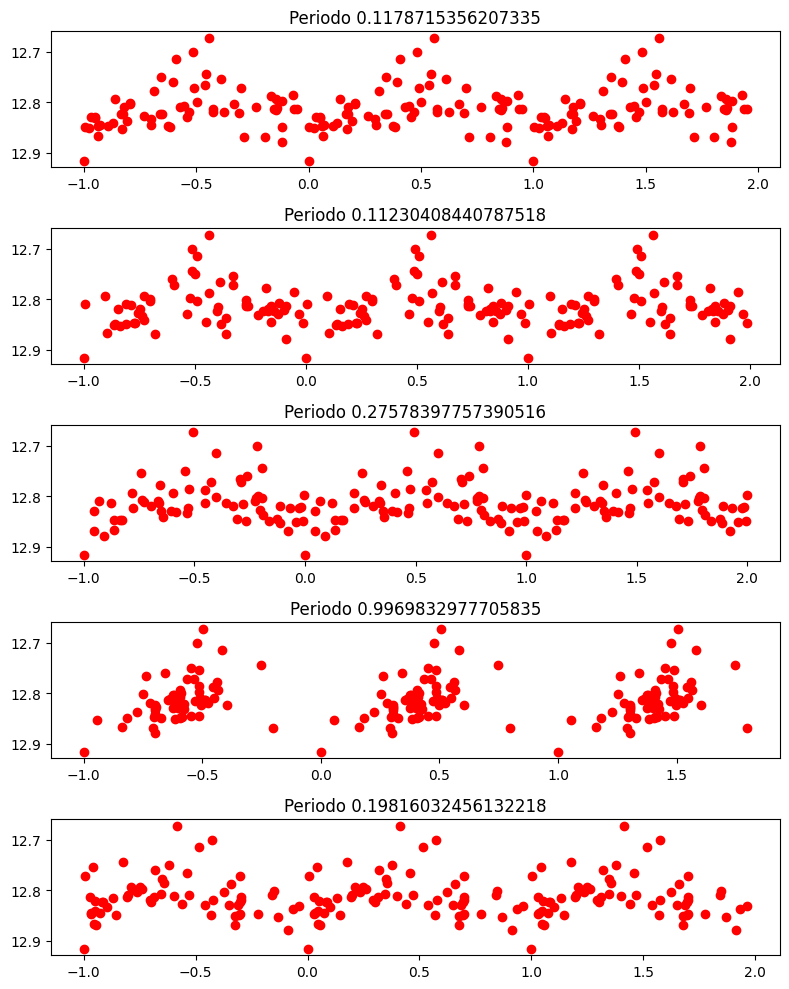

In [590]:
estrella = estrellas_filtradas_3['D2b27972705'] #D2b27972684

from sklearn.linear_model import LinearRegression

from scipy.optimize import curve_fit
        
potencia = estrella['potencia']
fap = estrella['fap']
frecuencia = estrella['frecuencias']
picos_periodo = estrella['picos_periodo']
tiempos = estrella['tiempos']
intensidad = estrella['intensidad']
normalizado = (intensidad - intensidad.min()) / (intensidad.max() - intensidad.min())

fig, axs = plt.subplots(n_peaks, figsize=(8, 10))

for i_p, periodo in enumerate(picos_periodo):

    fase = [phi(k, tiempos[0], periodo) for k in tiempos]
    """o = np.concatenate(fase, fase + np.ones(63), fase - np.ones(63))
    print((o))
    print(periodo, i_p, str(np.std(fase)))"""
    
    fase2 = fase + np.ones(len(fase))
    fase3 = fase - np.ones(len(fase))
    
    fase_t = np.concatenate((fase2, fase, fase3))
    int_t = np.concatenate((intensidad, intensidad, intensidad))
    
    fase=np.array(fase)
    axs[i_p].scatter(fase, intensidad,c="r")
    axs[i_p].scatter(fase+1, intensidad,c="r")
    axs[i_p].scatter(fase-1, intensidad,c="r")
    axs[i_p].set_title('Periodo ' + str(periodo))

    axs[i_p].invert_yaxis()  # Voltea el eje y
    
plt.tight_layout()
#
plt.show()


0.8278529082815511
ooooooooo -0.048190723762257234
0.8717391086845824
ooooooooo -0.002003034749970642
0.8594900244840992
ooooooooo -0.055079053275206125


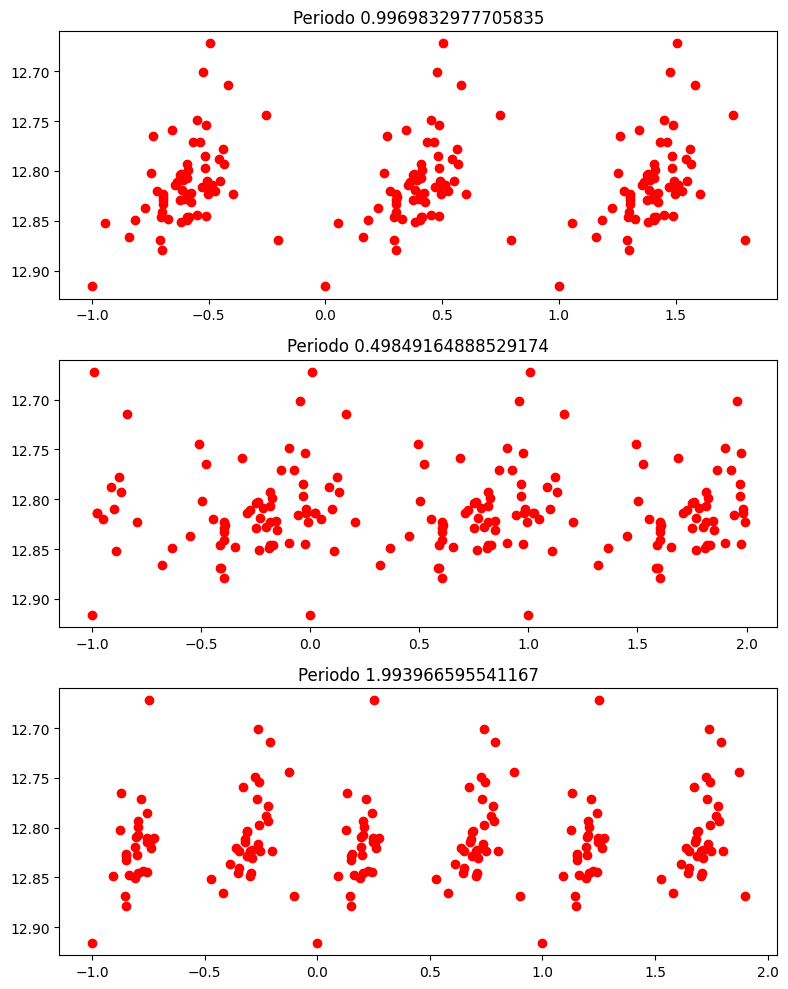

In [595]:
estrella = estrellas_filtradas_2['D2b27972705']

        
potencia = estrella['potencia']
fap = estrella['fap']
frecuencia = estrella['frecuencias']
mejor = estrella['picos_periodo'][3]  
picos_periodo = np.array([mejor, mejor /2, mejor *2 ])
tiempos = estrella['tiempos']
intensidad = estrella['intensidad']
normalizado = (intensidad - intensidad.min()) / (intensidad.max() - intensidad.min())


fig, axs = plt.subplots(3, figsize=(8, 10))

for i_p, periodo in enumerate(picos_periodo):

    fase = [phi(k, tiempos[0], periodo) for k in tiempos]
    
    fase2 = fase + np.ones(len(fase))
    fase3 = fase - np.ones(len(fase))
    
    fase_t = np.concatenate((fase, fase2, fase3))
    
    
    print(np.std(fase_t))
    
    media_x = np.mean(fase)
    media_y = np.mean(intensidad)
    covarianza = np.mean((fase - media_x) * (intensidad - media_y))
    
    desviacion_estandar_x = np.std(x)
    desviacion_estandar_y = np.std(y)
    coeficiente_correlacion = covarianza / (desviacion_estandar_x * desviacion_estandar_y)
    print('ooooooooo',coeficiente_correlacion)
    
    fase=np.array(fase)
    axs[i_p].scatter(fase, intensidad,c="r")
    axs[i_p].scatter(fase+1, intensidad,c="r")
    axs[i_p].scatter(fase-1, intensidad,c="r")
    axs[i_p].set_title('Periodo ' + str(periodo))

    axs[i_p].invert_yaxis()  # Voltea el eje y
    
plt.tight_layout()
plt.savefig('D2b27972705_otros_picos.jpeg')
plt.show()